In [1]:
import pandas as pd
from Main import settings, features, pf_set
import time
import pickle
from pandas.tseries.offsets import DateOffset
import Prepare_Data
import data_run_files
import return_prediction_functions
from return_prediction_functions import rff
import numpy as np
from pandas.tseries.offsets import MonthEnd
from sklearn.linear_model import Ridge
import General_Functions
import pickle
import Estimate_Covariance_Matrix
import os
import prepare_portfolio_data
import portfolio_choice_functions
import scipy.linalg
import functools
import importlib
sqrtm_cpp = importlib.import_module("sqrtm_cpp")
start_date = pd.to_datetime('1952-12-31')

#Relevante paths
output_path = "./data_fifty/"
pickle_file_path = "./data_fifty/model_1.pkl"
wealth_path = "./data_fifty/wealth.csv"
barra_file_path = "./data_fifty/barra_cov.pkl"
output_path_market_returns = "data_fifty/market_returns_test.csv"

risk_free_path = "./data_fifty/risk_free_test.csv" 
output_data_ret_csv = "./data_fifty/data_ret.csv"  
output_data_ret_ld1_csv = "./data_fifty/data_ret_ld1.csv"

file_path_cluster_labels = "Data/Cluster Labels.csv"
file_path_factor_details = "Data/Factor Details.xlsx"

risk_free = data_run_files.process_risk_free_rate(risk_free_path, start_date)
daily_path = "./data_fifty/daily.csv"
chars_path = "./data_fifty/chars_behandlet.parquet"


Features list length: 154
Filtrering udført. Antal rækker efter filtrering: 841
Fil gemt som ./data_test/risk_free_test.csv


In [1]:
import pandas as pd
from Main import settings, features, pf_set
import time
import pickle
from pandas.tseries.offsets import DateOffset
import Prepare_Data
import data_run_files
import return_prediction_functions
from return_prediction_functions import rff
import numpy as np
from pandas.tseries.offsets import MonthEnd
from sklearn.linear_model import Ridge
import General_Functions
import pickle
import Estimate_Covariance_Matrix
import os
import prepare_portfolio_data
import portfolio_choice_functions
import scipy.linalg
import matplotlib.pyplot as plt
import re
import pickle
start_date = pd.to_datetime('1952-12-31')

file_path_cluster_labels = "Data/Cluster Labels.csv"
file_path_factor_details = "Data/Factor Details.xlsx"

folder_name = "much_more_data"

output_path = os.path.join(".", folder_name, "")
market_path = os.path.join(".", folder_name, "market_returns_test.csv")
pickle_file_path = os.path.join(".", folder_name, "model_1.pkl")
wealth_path = os.path.join(".", folder_name, "wealth.csv")
barra_file_path = os.path.join(".", folder_name, "barra_cov.pkl")
output_path_market_returns = os.path.join(folder_name, "market_returns_test.csv")

risk_free_path = os.path.join(".", folder_name, "risk_free_test.csv")
#risk_free = data_run_files.process_risk_free_rate(risk_free_path, start_date, output_path = risk_free_path)
risk_free_path = "./data_fifty/risk_free_test.csv" 
risk_free = data_run_files.process_risk_free_rate(risk_free_path, start_date)
output_data_ret_csv = os.path.join(".", folder_name, "data_ret.csv")
output_data_ret_ld1_csv = os.path.join(".", folder_name, "data_ret_ld1.csv")
daily_path = os.path.join(".", folder_name, "daily.csv")
chars_path = os.path.join(".", folder_name, "chars_behandlet.parquet")
file_path_world_ret = os.path.join(".", folder_name, "world_ret_test.csv")
daily_file_path = os.path.join(".", folder_name, "usa_dsf_test.parquet")
output_path_usa = os.path.join(".", folder_name, "usa_test.parquet")
output_path_chars_behandlet =  os.path.join(".", folder_name, "chars_behandlet.parquet")
output_path_daily = os.path.join(".", folder_name, "daily.csv")
# Paths for Data-mappen forbliver uændrede
file_path_cluster_labels = os.path.join("Data", "Cluster Labels.csv")
file_path_factor_details = os.path.join("Data", "Factor Details.xlsx")


wealth = pd.read_csv(wealth_path)
wealth['eom'] = pd.to_datetime(wealth['eom'])
data_ret = pd.read_csv(output_data_ret_csv)
data_ret_ld1 = pd.read_csv(output_data_ret_ld1_csv)
data_ret['eom'] = pd.to_datetime(data_ret['eom'])
data_ret_ld1['eom'] = pd.to_datetime(data_ret_ld1['eom'])
data_ret_ld1['eom_ret'] = pd.to_datetime(data_ret_ld1['eom_ret'])
daily = pd.read_csv(daily_path, parse_dates=["date", "eom"])
chars = pd.read_parquet(chars_path)
chars_demean = pd.read_parquet(chars_path)
#Disse er alle korrekte

with open(barra_file_path, "rb") as file:
    barra_cov = pickle.load(file)

chars_path_demean = os.path.join(".", folder_name, "chars_demean_standarliseret_new.parquet")
chars_demean = pd.read_parquet(chars_path_demean)

output_folder = r"C:\Users\jonas\OneDrive\CBS\Kandidat - CBS\Speciale\Resultater Python"

# Hvis wealth skal æændres, så ændrer vi bare wealth_end
wealth_end_new = 1000000000 #1e9 er vores base case
end = settings["split"]["test_end"]
market_test = Prepare_Data.load_and_filter_market_returns_test(market_path)
wealth = Prepare_Data.wealth_func(wealth_end_new, end, market_test, risk_free)


market_path = os.path.join(".", folder_name, "market_returns_test.csv")
market = Prepare_Data.load_and_filter_market_returns_test(market_path)
market

Features list length: 154
Filtrering udført. Antal rækker efter filtrering: 841
Fil gemt som ./data_test/risk_free_test.csv
Filen er indlæst og filtreret succesfuldt.
Filen er indlæst og filtreret succesfuldt.


eom  mkt_vw_exc
0    1952-12-31    0.029113
1    1953-01-31   -0.003177
2    1953-02-28   -0.003027
3    1953-03-31   -0.014660
4    1953-04-30   -0.029152
..          ...         ...
836  2022-08-31   -0.038088
837  2022-09-30   -0.093270
838  2022-10-31    0.079050
839  2022-11-30    0.048429
840  2022-12-31   -0.063079

[841 rows x 2 columns]

# Indlæser wealth, chars, daily, data_ret og data_ret_ld1

In [2]:
wealth = pd.read_csv(wealth_path)
wealth['eom'] = pd.to_datetime(wealth['eom'])
data_ret = pd.read_csv(output_data_ret_csv)
data_ret_ld1 = pd.read_csv(output_data_ret_ld1_csv)
data_ret['eom'] = pd.to_datetime(data_ret['eom'])
data_ret_ld1['eom'] = pd.to_datetime(data_ret_ld1['eom'])
data_ret_ld1['eom_ret'] = pd.to_datetime(data_ret_ld1['eom_ret'])
daily = pd.read_csv(daily_path, parse_dates=["date", "eom"])
chars = pd.read_parquet(chars_path)

Disse er checket og se ser korrekte ud wuhu :D

In [3]:
data_ret

id        eom   ret_ld1   ret_ld2   ret_ld3   ret_ld4   ret_ld5  \
0      10104 1986-04-30 -0.064934  0.031988 -0.369114  0.059902 -0.141147   
1      10104 1986-05-31  0.031988 -0.369114  0.059902 -0.141147  0.258949   
2      10104 1986-06-30 -0.369114  0.059902 -0.141147  0.258949  0.190520   
3      10104 1986-07-31  0.059902 -0.141147  0.258949  0.190520 -0.039651   
4      10104 1986-08-31 -0.141147  0.258949  0.190520 -0.039651  0.297054   
...      ...        ...       ...       ...       ...       ...       ...   
90698  92655 2022-07-31 -0.044328 -0.026268  0.096893 -0.016168 -0.032461   
90699  92655 2022-08-31 -0.026268  0.096893 -0.016168 -0.032461  0.000000   
90700  92655 2022-09-30  0.096893 -0.016168 -0.032461  0.000000  0.000000   
90701  92655 2022-10-31 -0.016168 -0.032461  0.000000  0.000000  0.000000   
90702  92655 2022-11-30 -0.032461  0.000000  0.000000  0.000000  0.000000   

        ret_ld6   ret_ld7   ret_ld8   ret_ld9  ret_ld10  ret_ld11  ret_ld12  
0      0.258949  0.190520 -0.039651  0.297054  0.421617  0.137845  0.063897  
1      0.190520 -0.039651  0.297054  0.421617  0.137845  0.063897  0.155814  
2     -0.039651  0.297054  0.421617  0.137845  0.063897  0.155814 -0.188517  
3      0.297054  0.421617  0.137845  0.063897  0.155814 -0.188517  0.018414  
4      0.421617  0.137845  0.063897  0.155814 -0.188517  0.018414  0.171080  
...         ...       ...       ...       ...       ...       ...       ...  
90698  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90699  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90700  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90701  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90702  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[90703 rows x 14 columns]

## Hent Predictions :D

### Indlæsning af Pickle fil (predictions)

In [4]:
with open(pickle_file_path, "rb") as file:
    model_1 = pickle.load(file)

#print(model_1) #Vi bruger dog ikke ikke denne i selve 

# Barra COV

Just a quick check

In [5]:
with open(barra_file_path, "rb") as file:
    barra_cov = pickle.load(file)

In [6]:
print(barra_cov['2022-11-30']['ivol_vec'])

id
10104    0.004043
10107    0.002393
10138    0.002996
10696    0.003696
11308    0.001280
           ...   
87299    0.004106
87432    0.003534
87447    0.003139
87717    0.003166
92655    0.002555
Name: res_vol, Length: 180, dtype: float64


# Prepare Portfolio Data - tilføj return predictions, lambda list og datoer

In [7]:
chars = prepare_portfolio_data.add_return_predictions(chars,settings, output_path)

In [8]:
print(chars.shape) #Skal være 73216 x 131
print(chars[['id', 'eom','pred_ld1']])

(73216, 131)
          id        eom  pred_ld1
0      10104 1986-12-31       NaN
1      10104 1987-01-31       NaN
2      10104 1987-02-28       NaN
3      10104 1987-03-31       NaN
4      10104 1987-04-30       NaN
...      ...        ...       ...
73211  92655 2022-07-31  0.010957
73212  92655 2022-08-31  0.009506
73213  92655 2022-09-30  0.010641
73214  92655 2022-10-31  0.010774
73215  92655 2022-11-30  0.011608

[73216 rows x 3 columns]


In [9]:
# Filtrer de rækker, hvor pred_ld1 er NaN
missing_rows = chars[chars["pred_ld1"].isna()]

# Udskriv de første par rækker med kolonnerne 'eom' og 'pred_ld1'
print("De første rækker med NaN i pred_ld1:")
print(missing_rows[['eom', 'pred_ld1']].head())

# Antal rækker med NaN i pred_ld1
print("Antal NaN i pred_ld1:", len(missing_rows))

# Udtræk unikke datoer fra 'eom'-kolonnen i de filtrerede rækker
dates_with_missing = missing_rows['eom'].unique()
print("Datoer (eom) med NaN i pred_ld1:")
print(dates_with_missing)

De første rækker med NaN i pred_ld1:
         eom  pred_ld1
0 1986-12-31       NaN
1 1987-01-31       NaN
2 1987-02-28       NaN
3 1987-03-31       NaN
4 1987-04-30       NaN
Antal NaN i pred_ld1: 26095
Datoer (eom) med NaN i pred_ld1:
<DatetimeArray>
['1986-12-31 00:00:00', '1987-01-31 00:00:00', '1987-02-28 00:00:00',
 '1987-03-31 00:00:00', '1987-04-30 00:00:00', '1987-05-31 00:00:00',
 '1987-06-30 00:00:00', '1987-07-31 00:00:00', '1987-08-31 00:00:00',
 '1987-09-30 00:00:00',
 ...
 '2002-06-30 00:00:00', '2002-07-31 00:00:00', '2002-08-31 00:00:00',
 '2002-09-30 00:00:00', '2002-10-31 00:00:00', '2002-11-30 00:00:00',
 '2002-12-31 00:00:00', '2003-01-31 00:00:00', '2003-02-28 00:00:00',
 '2005-02-28 00:00:00']
Length: 313, dtype: datetime64[ns]


In [2]:
lambda_list = prepare_portfolio_data.create_lambda_list(chars_demean)

In [3]:
first_cov_date, hp_years, start_oos = prepare_portfolio_data.define_important_dates(barra_cov, settings)
date_ranges = prepare_portfolio_data.create_date_ranges(settings, first_cov_date, start_oos, hp_years)
dates_m1 = date_ranges["dates_m1"]
dates_m2 = date_ranges["dates_m2"]
dates_oos = date_ranges["dates_oos"]
dates_hp = date_ranges["dates_hp"]
#Disse er alle korrekte

# Base cases

In [13]:
print(wealth['eom'])
print(dates_oos)
print(pf_set)

0     1952-11-30
1     1952-12-31
2     1953-01-31
3     1953-02-28
4     1953-03-31
         ...    
837   2022-08-31
838   2022-09-30
839   2022-10-31
840   2022-11-30
841   2022-12-31
Name: eom, Length: 842, dtype: datetime64[ns]
DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', length=144, freq='ME')
{'wealth': 10000000000.0, 'gamma_rel': 10, 'mu': 0.007, 'lb_hor': 11}


In [14]:
ew = portfolio_choice_functions.ew_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set=pf_set)
mkt = portfolio_choice_functions.mkt_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)
rw = portfolio_choice_functions.rw_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)
mv = portfolio_choice_functions.mv_implement(data=chars, cov_list=barra_cov ,wealth=wealth, dates=dates_oos, pf_set= pf_set)
factor_ml = portfolio_choice_functions.factor_ml_implement(data = chars, wealth = wealth, dates= dates_oos, n_pfs=settings["factor_ml"]["n_pfs"]
, gam=pf_set['gamma_rel'])
tpf = portfolio_choice_functions.tpf_implement(data=chars, cov_list=barra_cov, wealth=wealth, dates=dates_oos, gam=pf_set["gamma_rel"])

# STATIC ML og performance for bm

In [15]:
General_Functions

<module 'General_Functions' from 'C:\\Users\\jonas\\PycharmProjects\\Master\\General_Functions.py'>

In [4]:
def create_lambda(x, ids):
    return np.diag([x[i] for i in ids])


In [5]:
import itertools


def static_val_fun(data, dates, cov_list, lambda_list, wealth, cov_type, gamma_rel, k=None, g=None, u=None, hps=None):
    """
    Beregner de statiske vægte for de angivne datoer.
    Parametre:
      - data: DataFrame med portefølje-data.
      - dates: Liste af datoer (som datetime-objekter).
      - cov_list: Dictionary med covariance-data pr. dato.
      - lambda_list: Dictionary med lambda-data pr. dato.
      - wealth: DataFrame med wealth-information (skal indeholde 'eom' og 'wealth', evt. 'mu_ld1').
      - cov_type: Type til justering af covariance.
      - gamma_rel: Skalar til vægtning.
      - k, g, u: Parametre, kan angives direkte.
      - hps: DataFrame med hyperparametre; hvis angivet, opdateres k, g og u for hver dato.
    """
    # Start med initiale weights (f.eks. VW, alt efter initial_weights_new)
    static_weights = General_Functions.initial_weights_new(data, w_type="vw")
    #print("static_weights")
    #print(static_weights)
    
    # Merge med kolonner fra data: id, eom, tr_ld1 og pred_ld1
    static_weights = static_weights.merge(data[['id', 'eom', 'tr_ld1', 'pred_ld1']], on=['id', 'eom'], how='left')
    # Merge med wealth for at få mu_ld1
    static_weights = static_weights.merge(wealth[['eom', 'mu_ld1']], on='eom', how='left')
    
    for d in dates:
        # Hvis hyperparametre (hps) er angivet, så opdater k, g og u
        if hps is not None:
            # Filtrer rækker hvor året for eom_ret er mindre end året for d
            hp_candidates = hps[hps['eom_ret'].dt.year < d.year]
            if not hp_candidates.empty:
                # Vælg den række med den seneste eom_ret
                hp = hp_candidates.loc[hp_candidates['eom_ret'].idxmax()]
                g = hp['g']
                u = hp['u']
                k = hp['k']
        
        # Hent wealth for datoen
        wealth_t_series = wealth.loc[wealth['eom'] == d, 'wealth']
        if wealth_t_series.empty:
            continue  # Eller håndtér fejlen, hvis der mangler data for d
        wealth_t = wealth_t_series.iloc[0]
        
        # Vælg de rækker i static_weights for datoen d
        mask = static_weights['eom'] == d
        # Sørg for, at id'erne er strenge (for at matche med de oprettede matricer)
        ids = static_weights.loc[mask, 'id'].tolist()

        
        # Byg covariance matrix og tilpas den
        sigma_gam = General_Functions.create_cov(cov_list[d], ids=ids) * gamma_rel

        sigma_gam = General_Functions.sigma_gam_adj(sigma_gam, g=g, cov_type=cov_type)
        
        # Byg lambda matrix og skaler med k
        lambda_val = create_lambda(lambda_list[d], ids=ids)
        lambda_val = lambda_val * k
        
        # Ekstraher de nødvendige kolonner som numpy-arrays
        pred_ld1 = static_weights.loc[mask, 'pred_ld1'].values
        w_start = static_weights.loc[mask, 'w_start'].values
        #print("w_start:", w_start)
        
        # Beregn højresidevektoren: pred_ld1 * u + wealth_t * (lambda @ w_start)
        rhs = (pred_ld1 * u) + wealth_t * (lambda_val.dot(w_start))
        # Matrix A: sigma_gam + wealth_t * lambda
        A = sigma_gam + wealth_t * lambda_val
        # Løs lineært system for at få nye vægte
        w_new = np.linalg.solve(A, rhs)
        # Tildel de beregnede vægte til kolonnen 'w' for de relevante rækker
        static_weights.loc[mask, 'w'] = w_new
        
        # Opdater startvægt for næste måned:
        try:
            current_index = list(dates).index(d)
            next_month = dates[current_index + 1]
        except IndexError:
            # Hvis der ikke er nogen næste dato, springes opdateringen over
            continue
        
        # Udregn 'w_opt_lag1' for de rækker, der svarer til d, men til næste måned
        temp = static_weights.loc[mask, ['id', 'w', 'tr_ld1', 'mu_ld1']].copy()
        temp['eom'] = next_month
        temp['w_opt_lag1'] = temp['w'] * (1 + temp['tr_ld1']) / (1 + temp['mu_ld1'])
        
        # Merge temp med static_weights på ['id', 'eom']
        static_weights = static_weights.merge(temp[['id', 'eom', 'w_opt_lag1']], on=['id', 'eom'], how='left')
        
        # Sæt w_start for rækker med eom == next_month
        next_mask = static_weights['eom'] == next_month
        static_weights.loc[next_mask, 'w_start'] = static_weights.loc[next_mask, 'w_opt_lag1']
        static_weights.loc[next_mask & static_weights['w_start'].isna(), 'w_start'] = 0
        
        # Fjern den midlertidige kolonne
        static_weights.drop(columns='w_opt_lag1', inplace=True)
        
    return static_weights


In [6]:
def static_implement(data_tc, cov_list, lambda_list, rf, wealth, mu, gamma_rel,
                     dates_full, dates_oos, dates_hp, hp_years,
                     k_vec, u_vec, g_vec, cov_type, validation=None, seed=None):
    """
    Fuldt statisk implementering.
    Parametre:
      - data_tc: DataFrame med tidsserie-data.
      - cov_list, lambda_list: Ordbøger med covariance- og lambda-data.
      - rf, wealth, mu, gamma_rel: Diverse parametre.
      - dates_full, dates_oos, dates_hp: Lister af datoer (skal være datetime-objekter).
      - hp_years: Årstal for HP-valg.
      - k_vec, u_vec, g_vec: Vektorer med hyperparametre.
      - cov_type: Typen af covariance.
      - validation: Valideringsresultater (kan være None, hvorefter de udregnes).
      - seed: Til eventuel reproducibilitet.
    """
    # Konverter nøglerne i cov_list og lambda_list til pd.Timestamp
    cov_list = {pd.to_datetime(key): value for key, value in cov_list.items()}
    lambda_list = {pd.to_datetime(key): value for key, value in lambda_list.items()}
    
    # Opret HP-grid: alle kombinationer af k, u og g
    static_hps = pd.DataFrame(list(itertools.product(k_vec, u_vec, g_vec)), columns=['k', 'u', 'g'])
    
    # Udvælg relevant data: valid == True og eom i dates_hp, med kolonnerne id, eom, me, tr_ld1, pred_ld1, sorteret efter id og eom
    data_rel = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_hp))][['id', 'eom', 'me', 'tr_ld1', 'pred_ld1']]
    data_rel = data_rel.sort_values(by=['id', 'eom'])
    
    # Hvis der ikke allerede er beregnet validation, udregnes den
    if validation is None:
        validation_list = []
        for i in range(len(static_hps)):
            print(i)
            hp = static_hps.iloc[i]
            static_w = static_val_fun(
                data_rel,
                dates=dates_hp,
                cov_list=cov_list,
                lambda_list=lambda_list,
                wealth=wealth,
                gamma_rel=gamma_rel,
                k=hp['k'],
                g=hp['g'],
                u=hp['u'],
                cov_type=cov_type
            )
            # Anvend pf_ts_fun på resultatet – denne funktion skal returnere en DataFrame med bl.a. 'eom_ret', 'r' og 'tc'
            static_w_pf = General_Functions.pf_ts_fun(static_w, data=data_tc, wealth=wealth, gam=gamma_rel)
            static_w_pf['hp_no'] = i
            static_w_pf['k'] = hp['k']
            static_w_pf['g'] = hp['g']
            static_w_pf['u'] = hp['u']
            validation_list.append(static_w_pf)
        validation = pd.concat(validation_list, ignore_index=True)
    
    # Sortér validation på hp_no og eom_ret
    validation.sort_values(by=['hp_no', 'eom_ret'], inplace=True)
    
    # Beregn kumulative middelværdier (cummean) per hp_no
    validation['cum_mean_r2'] = validation.groupby('hp_no')['r'].transform(lambda x: x.pow(2).expanding().mean())
    validation['cum_mean_r']  = validation.groupby('hp_no')['r'].transform(lambda x: x.expanding().mean())
    validation['cum_var'] = validation['cum_mean_r2'] - validation['cum_mean_r'] ** 2
    
    # Beregn cum_obj for hver hp_no: cummean(r - tc - 0.5 * cum_var * gamma_rel)
    def compute_cum_obj(group):
        return (group['r'] - group['tc'] - 0.5 * group['cum_var'] * gamma_rel).expanding().mean()
    
    validation['cum_obj'] = validation.groupby('hp_no', group_keys=False).apply(compute_cum_obj)
    
    # Beregn rangering inden for hver eom_ret-gruppe baseret på -cum_obj
    validation['rank'] = validation.groupby('eom_ret')['cum_obj'].rank(ascending=False, method='first')
    
    # Vælg de optimale HP'er: de rækker hvor eom_ret har måned == 12 og rank == 1, sorteret efter eom_ret
    optimal_hps = validation[(validation['eom_ret'].dt.month == 12) & (validation['rank'] == 1)].sort_values(by='eom_ret')
    
    # Implementér den endelige portefølje: vælg data_tc hvor eom i dates_oos og valid == True
    w_data = data_tc[(data_tc['eom'].isin(dates_oos)) & (data_tc['valid'] == True)][['id', 'eom', 'me', 'tr_ld1', 'pred_ld1']]
    w = static_val_fun(
        w_data,
        dates=dates_oos,
        cov_list=cov_list,
        lambda_list=lambda_list,
        wealth=wealth,
        gamma_rel=gamma_rel,
        hps=optimal_hps,
        cov_type=cov_type
    )
    
    pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
    pf['type'] = "Static-ML*"
    
    return {"hps": validation, "best_hps": optimal_hps, "w": w, "pf": pf}


In [36]:
static = static_implement(
    data_tc=chars_demean,
    cov_list=barra_cov,
    lambda_list=lambda_list,
    rf=risk_free,              # Data
    wealth=wealth,
    mu=pf_set['mu'],
    gamma_rel=52,  # Investor
    #gamma_rel=pf_set['gamma_rel'],  # Investor
    dates_full=dates_m1,
    dates_oos=dates_oos,
    dates_hp=dates_hp,
    hp_years=hp_years,          # Dates
    k_vec=settings['pf']['hps']['static']['k'],
    u_vec=settings['pf']['hps']['static']['u'],
    g_vec=settings['pf']['hps']['static']['g'],
    cov_type=settings['pf']['hps']['cov_type'],
    validation=None
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


C:\Users\jonas\AppData\Local\Temp\ipykernel_13992\3287424247.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [38]:
output_path_static = "./much_more_data/static_demean_std_features_new_staticQ_WEALTH1e9_GAMMA20.pkl"  # eller f.eks. "C:/min/mappe/static.pkl"
with open(output_path_static, "wb") as f:
    pickle.dump(static, f)

In [39]:
static["pf"]

inv  shorting  turnover         r        tc    eom_ret        type
0    0.372734  0.159370  1.019774 -0.001653  0.000414 2011-01-31  Static-ML*
1    0.452459  0.202223  0.355469  0.004548  0.000096 2011-02-28  Static-ML*
2    0.520638  0.235972  0.329592  0.003812  0.000081 2011-03-31  Static-ML*
3    0.573287  0.260244  0.330873  0.004901  0.000082 2011-04-30  Static-ML*
4    0.592832  0.269380  0.391028  0.000408  0.000108 2011-05-31  Static-ML*
..        ...       ...       ...       ...       ...        ...         ...
139  0.254591  0.108040  0.106629 -0.001599  0.000019 2022-08-31  Static-ML*
140  0.253784  0.107327  0.110496 -0.002304  0.000019 2022-09-30  Static-ML*
141  0.253948  0.108081  0.099432  0.004835  0.000016 2022-10-31  Static-ML*
142  0.262613  0.112371  0.110668  0.001790  0.000020 2022-11-30  Static-ML*
143  0.266609  0.115567  0.098747 -0.002437  0.000018 2022-12-31  Static-ML*

[144 rows x 7 columns]

In [37]:
print(np.mean(static["pf"]['r'])*12)
print(static["pf"]['r'].std() * np.sqrt(12))
print((np.mean(static["pf"]['r'])*12)/(static["pf"]['r'].std() * np.sqrt(12)))

0.017053605306416107
0.01848645456993627
0.9224919381864414


In [113]:


# Sti til din base-mappe
base_path = "./data_fifty/"
# Hent liste over undermapper/filer


# Saml porteføljerne i én DataFrame inklusiv Static-ML
bm_pfs = pd.concat(
    [tpf["pf"], factor_ml["pf"], ew["pf"], mkt["pf"], rw["pf"], mv["pf"], static["pf"], pfml["pf"]], 
    ignore_index=True
)
#bm_pfs = pd.concat(
#    [tpf["pf"], factor_ml["pf"], ew["pf"], mkt["pf"], rw["pf"], mv["pf"], static["pf"], pf], 
#    ignore_index=True
#)

# Gem resultatet som CSV
bm_pfs.to_csv(f"{output_path}/bms.csv", index=False)

# Læs CSV-filen med pandas
bm_pfs = pd.read_csv(os.path.join(base_path, "bms.csv"))

# Konverter eom_ret til dato
bm_pfs['eom_ret'] = pd.to_datetime(bm_pfs['eom_ret'])

# Erstat "Rank-Weighted" med "Rank-ML" i kolonnen type
bm_pfs.loc[bm_pfs['type'] == 'Rank-Weighted', 'type'] = 'Rank-ML'

pfs = bm_pfs


In [114]:
pfs

inv  shorting  turnover         r        tc    eom_ret  \
0     2.374874  0.911181  2.749611 -0.019087  0.114453 2011-01-31   
1     2.352451  0.882116  1.247630  0.030696  0.031585 2011-02-28   
2     2.321573  0.856519  1.203831  0.017178  0.034866 2011-03-31   
3     2.457776  0.902953  1.219077  0.037375  0.023136 2011-04-30   
4     2.497646  0.890874  1.629737  0.017609  0.052276 2011-05-31   
...        ...       ...       ...       ...       ...        ...   
1147  2.726881  0.691713  0.061152 -0.065374  0.000066 2022-08-31   
1148  2.732043  0.701073  0.058253 -0.099237  0.000063 2022-09-30   
1149  2.737995  0.690528  0.052495  0.129959  0.000056 2022-10-31   
1150  2.790234  0.713260  0.052952  0.119007  0.000064 2022-11-30   
1151  2.827138  0.726948  0.063436 -0.074544  0.000091 2022-12-31   

              type  
0     Markowitz-ML  
1     Markowitz-ML  
2     Markowitz-ML  
3     Markowitz-ML  
4     Markowitz-ML  
...            ...  
1147  Portfolio-ML  
1148  Portfolio-ML  
1149  Portfolio-ML  
1150  Portfolio-ML  
1151  Portfolio-ML  

[1152 rows x 7 columns]

In [115]:
static_ml_star = pfs[pfs['type'] == "Static-ML*"]
static_ml_star

inv  shorting  turnover         r        tc    eom_ret        type
864   0.554832  0.100416  0.646000  0.002297  0.001726 2011-01-31  Static-ML*
865   0.533430  0.132773  0.085122  0.013704  0.000043 2011-02-28  Static-ML*
866   0.516617  0.130679  0.047758  0.006654  0.000013 2011-03-31  Static-ML*
867   0.515979  0.130808  0.034127  0.015186  0.000008 2011-04-30  Static-ML*
868   0.524208  0.126218  0.035890  0.002555  0.000009 2011-05-31  Static-ML*
...        ...       ...       ...       ...       ...        ...         ...
1003  0.641220  0.205419  0.034772 -0.005651  0.000016 2022-08-31  Static-ML*
1004  0.642837  0.208435  0.035891 -0.013831  0.000017 2022-09-30  Static-ML*
1005  0.640168  0.207090  0.032889  0.023965  0.000017 2022-10-31  Static-ML*
1006  0.645684  0.210804  0.028953  0.011682  0.000015 2022-11-30  Static-ML*
1007  0.659791  0.224092  0.033937 -0.004982  0.000018 2022-12-31  Static-ML*

[144 rows x 7 columns]

In [116]:
pfs = bm_pfs



In [117]:
subset_hps = static["hps"][
    static["hps"]["eom_ret"].isin(static["pf"]["eom_ret"]) &
    (static["hps"]["k"] == 1) &
    (static["hps"]["g"] == 0) &
    (static["hps"]["u"] == 1)
].copy()

subset_hps["eom_ret"] = pd.to_datetime(subset_hps["eom_ret"])
subset_hps = subset_hps[["eom_ret", "inv", "shorting", "turnover", "r", "tc"]]
subset_hps["type"] = "Static-ML"

pfs = pd.concat([   # Static-ML portefølje-tidsserie
    bm_pfs,         # Benchmark-porteføljer
    subset_hps      # Filtreret subset af static["hps"]
], ignore_index=True)

In [118]:
# Antag at 'static' er en dictionary med dataframes under nøglerne "pf" og "hps", 
# og at bm_pfs også er en pandas DataFrame.

# Filtrer static["hps"] efter de ønskede kriterier
subset_hps = static["hps"][
    static["hps"]["eom_ret"].isin(static["pf"]["eom_ret"]) &
    (static["hps"]["k"] == 1) &
    (static["hps"]["g"] == 0) &
    (static["hps"]["u"] == 1)
].copy()

# Sørg for at 'eom_ret' er datetime (hvis ikke allerede)
subset_hps["eom_ret"] = pd.to_datetime(subset_hps["eom_ret"])

# Vælg de ønskede kolonner
subset_hps = subset_hps[["eom_ret", "inv", "shorting", "turnover", "r", "tc"]]

# Tilføj en kolonne 'type' med værdien "Static-ML"
subset_hps["type"] = "Static-ML"

# Kombinér de tre dataframes med pd.concat (svarer til rbind i R)
pfs = pd.concat([
    bm_pfs,         # Benchmark-porteføljer
    subset_hps      # Filtreret subset af static["hps"]
], ignore_index=True)

pf_order = [
    "Portfolio-ML",  # denne er kommenteret ud som i R-koden
    "Static-ML",
    "Static-ML*",
    "Markowitz-ML",
    "Factor-ML",
    "Rank-ML",
    "Minimum Variance",
    "1/N",
    "Market"
]



In [119]:
subset_hps

eom_ret       inv  shorting  turnover         r        tc       type
1704 2011-01-31  4.057049  1.801835  0.098686 -0.044073  0.000067  Static-ML
1705 2011-02-28  3.986499  1.771122  0.108771  0.038245  0.000074  Static-ML
1706 2011-03-31  3.969017  1.769464  0.125183  0.031880  0.000097  Static-ML
1707 2011-04-30  3.959380  1.734622  0.079722  0.043168  0.000049  Static-ML
1708 2011-05-31  3.966033  1.706513  0.100753  0.002912  0.000074  Static-ML
...         ...       ...       ...       ...       ...       ...        ...
1843 2022-08-31  3.929253  1.687879  0.108423 -0.023708  0.000144  Static-ML
1844 2022-09-30  3.957043  1.709797  0.095105 -0.021082  0.000121  Static-ML
1845 2022-10-31  3.951306  1.701039  0.095615  0.082823  0.000121  Static-ML
1846 2022-11-30  3.989279  1.710169  0.095349  0.029509  0.000140  Static-ML
1847 2022-12-31  4.056738  1.761781  0.093984  0.006576  0.000134  Static-ML

[144 rows x 7 columns]

In [120]:
pfs["type"].unique()

array(['Markowitz-ML', 'Factor-ML', '1/N', 'Market', 'Rank-ML',
       'Minimum Variance', 'Static-ML*', 'Portfolio-ML', 'Static-ML'],
      dtype=object)

In [121]:
main_types = pf_order

# 3) Tildel factor-rækkefølgen og sorter
pfs['type'] = pd.Categorical(pfs['type'], categories=pf_order, ordered=True)
pfs = pfs.sort_values(by=['type', 'eom_ret'])

pfs['e_var_adj'] = pfs.groupby('type')['r'].transform(lambda x: (x - x.mean())**2)

# Beregn utility_t: r - tc - 0.5 * e_var_adj * gamma_rel (her antages pf_set være en dictionary)
pfs['utility_t'] = pfs['r'] - pfs['tc'] - 0.5 * pfs['e_var_adj'] * pf_set['gamma_rel']

# Portfolio summary stats --------------
def summary_stats(group):
    n = group.shape[0]
    inv = group['inv'].mean()
    shorting = group['shorting'].mean()
    turnover_notional = group['turnover'].mean()
    r_mean = group['r'].mean() * 12
    sd = group['r'].std() * np.sqrt(12)
    sr_gross = (group['r'].mean()/group['r'].std() * np.sqrt(12)) if group['r'].std() != 0 else np.nan
    tc = group['tc'].mean() * 12
    r_tc = (group['r'] - group['tc']).mean() * 12
    sr = ((group['r'] - group['tc']).mean()/group['r'].std() * np.sqrt(12)) if group['r'].std() != 0 else np.nan
    obj = (group['r'].mean() - 0.5 * group['r'].var() * pf_set['gamma_rel'] - group['tc'].mean()) * 12
    return pd.Series({
        'n': n,
        'inv': inv,
        'shorting': shorting,
        'turnover_notional': turnover_notional,
        'r': r_mean,
        'sd': sd,
        'sr_gross': sr_gross,
        'tc': tc,
        'r_tc': r_tc,
        'sr': sr,
        'obj': obj
    })

pf_summary = pfs.groupby('type').apply(summary_stats).reset_index()
pf_summary = pf_summary.sort_values(by='type')

# Fjern ikke-essentielle typer (hvis nødvendigt)
pfs = pfs[pfs['type'].isin(main_types)].copy()
pfs['type'] = pd.Categorical(pfs['type'], categories=main_types, ordered=True)

# Udskriv resuméet
print(pf_summary)

               type      n        inv  shorting  turnover_notional         r  \
0      Portfolio-ML  144.0   3.029671  0.814628           0.099722  0.198039   
1         Static-ML  144.0   4.225897  1.742836           0.145632  0.095125   
2        Static-ML*  144.0   0.955967  0.304393           0.067874  0.044620   
3      Markowitz-ML  144.0  10.953368  5.048301           8.776867  0.217868   
4         Factor-ML  144.0   2.000000  1.000000           1.823863  0.089088   
5           Rank-ML  144.0   2.000000  1.000000           0.987215  0.047434   
6  Minimum Variance  144.0   2.280726  0.640363           1.142763  0.108365   
7               1/N  144.0   1.000000  0.000000           0.052444  0.129325   
8            Market  144.0   1.000000  0.000000           0.008496  0.120273   

         sd  sr_gross         tc       r_tc          sr        obj  
0  0.242310  0.817298   0.001830   0.196210    0.809748  -0.097360  
1  0.127910  0.743682   0.003174   0.091950    0.718866   0.0

In [122]:
static_ml_star = pfs[pfs['type'] == "Static-ML*"]
print("Antal rækker for Static-ML*:", static_ml_star.shape[0])
display(static_ml_star)


Antal rækker for Static-ML*: 144


inv  shorting  turnover         r        tc    eom_ret        type  \
864   0.554832  0.100416  0.646000  0.002297  0.001726 2011-01-31  Static-ML*   
865   0.533430  0.132773  0.085122  0.013704  0.000043 2011-02-28  Static-ML*   
866   0.516617  0.130679  0.047758  0.006654  0.000013 2011-03-31  Static-ML*   
867   0.515979  0.130808  0.034127  0.015186  0.000008 2011-04-30  Static-ML*   
868   0.524208  0.126218  0.035890  0.002555  0.000009 2011-05-31  Static-ML*   
...        ...       ...       ...       ...       ...        ...         ...   
1003  0.641220  0.205419  0.034772 -0.005651  0.000016 2022-08-31  Static-ML*   
1004  0.642837  0.208435  0.035891 -0.013831  0.000017 2022-09-30  Static-ML*   
1005  0.640168  0.207090  0.032889  0.023965  0.000017 2022-10-31  Static-ML*   
1006  0.645684  0.210804  0.028953  0.011682  0.000015 2022-11-30  Static-ML*   
1007  0.659791  0.224092  0.033937 -0.004982  0.000018 2022-12-31  Static-ML*   

      e_var_adj  utility_t  
864    0.000002   0.000561  
865    0.000100   0.013163  
866    0.000009   0.006599  
867    0.000132   0.014521  
868    0.000001   0.002540  
...         ...        ...  
1003   0.000088  -0.006106  
1004   0.000308  -0.015388  
1005   0.000410   0.021898  
1006   0.000063   0.011349  
1007   0.000076  -0.005379  

[144 rows x 9 columns]

In [123]:
static_ml_star = pfs[pfs['type'] == "Static-ML"]
print("Antal rækker for Static-ML*:", static_ml_star.shape[0])
display(static_ml_star)


Antal rækker for Static-ML*: 144


inv  shorting  turnover         r        tc    eom_ret       type  \
1152  4.057049  1.801835  0.098686 -0.044073  0.000067 2011-01-31  Static-ML   
1153  3.986499  1.771122  0.108771  0.038245  0.000074 2011-02-28  Static-ML   
1154  3.969017  1.769464  0.125183  0.031880  0.000097 2011-03-31  Static-ML   
1155  3.959380  1.734622  0.079722  0.043168  0.000049 2011-04-30  Static-ML   
1156  3.966033  1.706513  0.100753  0.002912  0.000074 2011-05-31  Static-ML   
...        ...       ...       ...       ...       ...        ...        ...   
1291  3.929253  1.687879  0.108423 -0.023708  0.000144 2022-08-31  Static-ML   
1292  3.957043  1.709797  0.095105 -0.021082  0.000121 2022-09-30  Static-ML   
1293  3.951306  1.701039  0.095615  0.082823  0.000121 2022-10-31  Static-ML   
1294  3.989279  1.710169  0.095349  0.029509  0.000140 2022-11-30  Static-ML   
1295  4.056738  1.761781  0.093984  0.006576  0.000134 2022-12-31  Static-ML   

      e_var_adj  utility_t  
1152   0.002704  -0.057660  
1153   0.000919   0.033575  
1154   0.000574   0.028915  
1155   0.001242   0.036909  
1156   0.000025   0.002712  
...         ...        ...  
1291   0.001001  -0.028856  
1292   0.000842  -0.025410  
1293   0.005609   0.054655  
1294   0.000466   0.027040  
1295   0.000002   0.006433  

[144 rows x 9 columns]

In [124]:

gamma_rel = pf_set["gamma_rel"]  

# Beregn portefølje-sammenfatningsstatistikker
pf_summary = pfs.groupby("type").agg(
    n=("eom_ret", "count"),  # Antal observationer
    inv=("inv", "mean"),  # Gennemsnitlig investering
    shorting=("shorting", "mean"),  # Gennemsnitlig shorting
    turnover_notional=("turnover", "mean"),  # Gennemsnitlig omsætning (turnover)
    r=("r", lambda x: x.mean() * 12),  # Gennemsnitligt afkast annualiseret
    sd=("r", lambda x: x.std() * (12**0.5)),  # Volatilitet annualiseret
    sr_gross=("r", lambda x: x.mean() / x.std() * (12**0.5) if x.std() > 0 else None),  # Sharpe Ratio før transaktionsomkostninger
    tc=("tc", lambda x: x.mean() * 12),  # Gennemsnitlige transaktionsomkostninger annualiseret
    r_tc=("r", lambda x: (x - pfs.loc[x.index, "tc"]).mean() * 12),  # Nettoafkast efter transaktionsomkostninger
    sr=("r", lambda x: (x - pfs.loc[x.index, "tc"]).mean() / x.std() * (12**0.5) if x.std() > 0 else None),  # Sharpe Ratio efter transaktionsomkostninger
    obj=("r", lambda x: (x.mean() - 0.5 * x.var() * gamma_rel - pfs.loc[x.index, "tc"].mean()) * 12)  # Optimeringsmål
).reset_index()

# Sorter efter type
pf_summary = pf_summary.sort_values(by="type")

# Filtrer pfs til kun at inkludere de relevante typer (main_types skal defineres)
main_types = ["Markowitz-ML", "Factor-ML", "Market", "Rank-ML", "Minimum Variance", "Static-ML", "Static-ML*", "Portfolio-ML"]  # Tilpas efter behov
pfs = pfs[pfs["type"].isin(main_types)]
pfs["type"] = pd.Categorical(pfs["type"], categories=main_types, ordered=True)

# Vis resultatet
from IPython.display import display
display(pf_summary)

type    n        inv  shorting  turnover_notional         r  \
0      Portfolio-ML  144   3.029671  0.814628           0.099722  0.198039   
1         Static-ML  144   4.225897  1.742836           0.145632  0.095125   
2        Static-ML*  144   0.955967  0.304393           0.067874  0.044620   
3      Markowitz-ML  144  10.953368  5.048301           8.776867  0.217868   
4         Factor-ML  144   2.000000  1.000000           1.823863  0.089088   
5           Rank-ML  144   2.000000  1.000000           0.987215  0.047434   
6  Minimum Variance  144   2.280726  0.640363           1.142763  0.108365   
7               1/N  144   1.000000  0.000000           0.052444  0.129325   
8            Market  144   1.000000  0.000000           0.008496  0.120273   

         sd  sr_gross         tc       r_tc          sr        obj  
0  0.242310  0.817298   0.001830   0.196210    0.809748  -0.097360  
1  0.127910  0.743682   0.003174   0.091950    0.718866   0.010145  
2  0.047281  0.943727   0.000810   0.043810    0.926586   0.032632  
3  0.251235  0.867189  50.583412 -50.365544 -200.471870 -50.681139  
4  0.161915  0.550212   2.586110  -2.497022  -15.421821  -2.628104  
5  0.086572  0.547911   0.451931  -0.404497   -4.672365  -0.441971  
6  0.121299  0.893375   0.601862  -0.493497   -4.068447  -0.567064  
7  0.158812  0.814327   0.001649   0.127676    0.803943   0.001570  
8  0.143452  0.838420   0.000031   0.120242    0.838207   0.017350

# Variable Defination

In [24]:
import copy

data_tc = copy.deepcopy(chars)
cov_list = copy.deepcopy(barra_cov)
lambda_list = copy.deepcopy(lambda_list)
risk_free = copy.deepcopy(risk_free)
#features = copy.deepcopy(features)
#wealth = copy.deepcopy(wealth)
mu = copy.deepcopy(pf_set['mu'])
gamma_rel = copy.deepcopy(pf_set['gamma_rel'])
dates_full = copy.deepcopy(dates_m2)
lb = copy.deepcopy(pf_set['lb_hor'])
scale = copy.deepcopy(settings['pf_ml']['scale'])
g_vec = copy.deepcopy(settings['pf_ml']['g_vec'])
p_vec = copy.deepcopy(settings['pf_ml']['p_vec'])
l_vec = copy.deepcopy(settings['pf_ml']['l_vec'])
orig_feat = copy.deepcopy(settings['pf_ml']['orig_feat'])
iter = copy.deepcopy(10)
rff_feat = copy.deepcopy(True)
seed = copy.deepcopy(settings['seed_no'])


In [25]:
#print(data_tc.describe())
#rff_feat

In [26]:
variables = {
    "data_tc": data_tc,
    "cov_list": cov_list,
    "lambda_list": lambda_list,
    "risk_free": risk_free,
    "features": features,
    "wealth": wealth,
    "mu": mu,
    "gamma_rel": gamma_rel,
    "dates_full": dates_full,
    "lb": lb,
    "scale": scale,
    "g_vec": g_vec,
    "p_vec": p_vec,
    "l_vec": l_vec,
    "orig_feat": orig_feat,
    "iter": iter,
    "rff_feat": rff_feat,
    "seed": seed
}

for name, value in variables.items():
    print(f"{name} is of type: {type(value)}")


data_tc is of type: <class 'pandas.core.frame.DataFrame'>
cov_list is of type: <class 'dict'>
lambda_list is of type: <class 'dict'>
risk_free is of type: <class 'pandas.core.frame.DataFrame'>
features is of type: <class 'list'>
wealth is of type: <class 'pandas.core.frame.DataFrame'>
mu is of type: <class 'float'>
gamma_rel is of type: <class 'int'>
dates_full is of type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
lb is of type: <class 'int'>
scale is of type: <class 'bool'>
g_vec is of type: <class 'list'>
p_vec is of type: <class 'list'>
l_vec is of type: <class 'list'>
orig_feat is of type: <class 'bool'>
iter is of type: <class 'int'>
rff_feat is of type: <class 'bool'>
seed is of type: <class 'int'>


# Portfolio ML

In [ ]:
def create_lambda(x, ids):
    return np.diag([x[i] for i in ids])


In [ ]:
def pfml_hp_reals_fun(pfml_input, hp_coef, p_vec, l_vec, hp_years, orig_feat):
    """
    Beregner realiseret nytte (realized utility) for hver p i hvert hp‑år.
    
    Parametre:
      pfml_input : dict, med mindst nøglen "reals". 
                   pfml_input["reals"] skal være en dictionary, hvor nøglerne er datoer (som strings eller Timestamps)
                   og værdierne er dicts med mindst 'r_tilde' og 'denom' (typisk NumPy-arrays).
      hp_coef    : dict med koefficienter, indekseret på år (som strings) og herefter på p (som strings) og indeks for l_vec.
      p_vec      : Liste af p‑værdier.
      l_vec      : Liste af l‑værdier.
      hp_years   : Liste af hp‑år (typisk årstal som tal).
      orig_feat  : Parametre til pfml_feat_fun (f.eks. en liste eller anden struktur, som angiver hvilke features der skal vælges).
    
    Returnerer:
      validation : En pandas DataFrame med kolonnerne:
         - eom      : Dato (Timestamp) for observationen.
         - eom_ret  : Den "realiserende" dato, her defineret som eom + 1 måned.
         - obj      : Den beregnede nytte (objective) for den pågældende dato.
         - l        : Den l‑værdi, der blev brugt.
         - p        : Den p‑værdi, der blev brugt.
         - hp_end   : Det hp‑år, der svarer til de observationer.
         - cum_obj  : Kumulativ middelværdi af obj for hver (p, l) gruppe.
         - rank     : Rangeringen af -cum_obj inden for hver eom_ret-gruppe.
    """
    validation_dfs = []  
    for end in hp_years:
        # Definer intervallet: fra (end-1)-12-31 til end-11-30
        lower_bound = pd.to_datetime(f"{end-1}-12-31")
        upper_bound = pd.to_datetime(f"{end}-11-30")
        # Filter pfml_input["reals"] til de datoer i dette interval
        #reals_all = {k: v for k, v in reals_all_all.items() if lower_bound <= k <= upper_bound}
        reals_all = {pd.to_datetime(k): v for k, v in pfml_input["reals"].items() if lower_bound <= pd.to_datetime(k) <= upper_bound}
        # Hent koefficientlisten for dette år
        coef_list_yr = hp_coef[str(end)]
        
        # For hver p i p_vec
        p_dfs = []
        for p in p_vec:
            # Få de relevante features via pfml_feat_fun (forventet at returnere en liste af indekser)
            feat_p = pfml_feat_fun(p=p, orig_feat=orig_feat)
            # Hent koefficientlisten for denne p
            coef_list_p = coef_list_yr[str(p)]
            # For hver observation i reals_all skal vi vælge de features, der svarer til feat_p:
            feat_indices = [feat_p.index(f) for f in feat_p if f in feat_p]
            reals = {
                k: {
                    "r_tilde": np.array(v["r_tilde"])[feat_indices],
                    "denom": np.array(v["denom"])[np.ix_(feat_indices, feat_indices)]
                }
                for k, v in reals_all.items()
            }
            
            # For hver l-værdi (brug i indeks i l_vec)
            l_dfs = []
            for l_val in l_vec:
                coef = coef_list_p[str(l_val)]
                rows = []
                # For hver dato (nm) i reals (nøglerne)
                for nm, x in reals.items():
                    # Beregn r = t(x$r_tilde) %*% coef - 0.5 * t(coef) %*% x$denom %*% coef
                    r_val = np.dot(x["r_tilde"].T, coef) - 0.5 * np.dot(np.dot(coef.T, x["denom"]), coef)
                    # Hvis r_val er skalar, konverter til float
                    if np.isscalar(r_val):
                        r_val = float(r_val)
                    # Opret række med:
                    #   eom: datoen (konverteret til Timestamp)
                    #   eom_ret: eom + 1 måned (som i R: as.Date(nm) + months(1))
                    #   obj: r_val
                    #   l: den aktuelle l-værdi
                    row = {
                        "eom": pd.to_datetime(nm),
                     #   "eom_ret": pd.to_datetime(nm) + pd.DateOffset(months=1),
                        "eom_ret": (pd.to_datetime(nm) + pd.offsets.MonthEnd(1)),
                        "obj": r_val,
                        "l": l_val
                    }
                    rows.append(row)
                # Opret en DataFrame for denne l-værdi
                df_l = pd.DataFrame(rows)
                l_dfs.append(df_l)
            # Kombinér over l_vec og tilføj p-kolonnen
            df_p = pd.concat(l_dfs, ignore_index=True)
            df_p["p"] = p
            p_dfs.append(df_p)
        # Kombinér over p_vec og tilføj hp_end-kolonnen
        df_end = pd.concat(p_dfs, ignore_index=True)
        df_end["hp_end"] = end
        validation_dfs.append(df_end)
    
    # Kombinér over alle hp_years
    validation = pd.concat(validation_dfs, ignore_index=True)
    
    # Sortér efter p, l, eom_ret
    validation = validation.sort_values(by=["p", "l", "eom_ret"])
    # Beregn kumulativ middelværdi (cum_obj) for hver gruppe (p, l)
    validation["cum_obj"] = validation.groupby(["p", "l"])["obj"].transform(lambda x: x.expanding().mean())
    # Beregn rangeringen af -cum_obj inden for hver eom_ret-gruppe
    validation["rank"] = validation.groupby("eom_ret")["cum_obj"].rank(ascending=False, method="min")
    
    return validation


In [ ]:
def pfml_aims_fun(pfml_input, validation, data_tc, hp_coef, hp_years, dates_oos, l_vec, orig_feat):

    validation = validation.copy()
    validation['hp_end'] = validation['eom_ret'].dt.year
    # Filter opt_hps
    opt_hps = validation[(validation['eom_ret'].dt.month == 12) & (validation['rank'] == 1)][['hp_end', 'l', 'p']]
    
    aim_pfs_list = {}
    
    for d in dates_oos:
        # d_ret: "realiserende" dato – i R: d + 1 + months(1) - 1, dvs. sidste dag i næste måned
        d_ret = d + pd.offsets.MonthEnd(1)
        oos_year = d_ret.year
        hp_year = oos_year - 1
        
        # Filtrér opt_hps for rækker med hp_end == hp_year
        hps_d = opt_hps[opt_hps['hp_end'] == hp_year]
        if hps_d.empty:
            continue  # Ingen optimal hp for dette år, spring denne dato over
        
        # Forvent, at der kun er én række; hent p og l
        p_val = hps_d['p'].iloc[0]
        l_val = hps_d['l'].iloc[0]
    
        feat_p = pfml_feat_fun(p=p_val, orig_feat=orig_feat)
    
    
        d_key = d.strftime('%Y-%m-%d')
        s = pfml_input["signal_t"].get(d_key, None)
        if s is None:
            print(f"Ingen signal fundet for dato {d_key}")
            continue
    
        feat_indices = [feat_p.index(f) for f in feat_p if f in feat_p]
        s = s[:, feat_indices]
    
        try:
            l_no = next(i for i, val in enumerate(l_vec) if np.isclose(val, l_val))
        except StopIteration:
            print(f"Kunne ikke finde l={l_val} i l_vec for dato {d_key}")
            continue
    
        l_key = str(l_vec[l_no])  # potentiel fejl
        coef = hp_coef.get(str(oos_year), {}).get(str(p_val), {}).get(l_key) # potentiel fejl
        # Filtrér data_tc for observationer, hvor valid==True og eom==d_key.
        aim_pf = data_tc[(data_tc['valid'] == True) & (data_tc['eom'] == d_key)][['id', 'eom']].copy()
    
        w_aim = (s @ coef).flatten()
        aim_pf['w_aim'] = w_aim
        
        # Gem resultatet for denne dato i aim_pfs_list.
        aim_pfs_list[d_key] = {"aim_pf": aim_pf, "coef": coef}

    
    return aim_pfs_list


In [28]:
def pfml_input_fun(data_tc, cov_list, lambda_list, gamma_rel, wealth, mu, dates, lb, scale, 
                   risk_free, features, rff_feat, seed, p_max, g, add_orig, iter, balanced):
    
    cov_list = {pd.to_datetime(key): value for key, value in cov_list.items()}
    lambda_list = {pd.to_datetime(key): value for key, value in lambda_list.items()}
    
    # --- Lookback-datoer ---
    min_date = min(dates)
    max_date = max(dates)
    start_date = (min_date + pd.Timedelta(days=1)) - MonthEnd(lb+1)
    dates_lb = pd.date_range(start=start_date, end=max_date, freq=MonthEnd())
    
    # --- Oprettelse af Random Fourier Features ---
    if rff_feat:
        np.random.seed(seed)
        X_features = data_tc[features].values
        rff_x = rff(X_features, p=p_max, g=g)
        rff_w = rff_x['W']
        X_cos = rff_x['X_cos']
        X_sin = rff_x['X_sin']
        rff_features = np.hstack([X_cos, X_sin])
        num = p_max // 2
        rff_colnames = [f"rff{i}_cos" for i in range(1, num+1)] + [f"rff{i}_sin" for i in range(1, num+1)]
        rff_df = pd.DataFrame(rff_features, columns=rff_colnames, index=data_tc.index)
        data = pd.concat([data_tc[['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0']].reset_index(drop=True),
                          rff_df.reset_index(drop=True)], axis=1)
        feat_new = list(rff_df.columns)
        if add_orig:
            data = pd.concat([data, data_tc[features].reset_index(drop=True)], axis=1)
            feat_new = feat_new + features
    else:
        cols = ['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0'] + features
        data = data_tc[cols].copy()
        feat_new = features.copy()
    
    # Konverter 'eom' til str for konsistens
    data['eom'] = pd.to_datetime(data['eom']).dt.strftime('%Y-%m-%d')
    
    feat_cons = feat_new + ['constant']
    
    # --- Tilføjelse af scales ---
    if scale:
        scales_list = []
        for d in dates_lb:
            d_str = d.strftime('%Y-%m-%d')
            sigma = General_Functions.create_cov(cov_list[d_str])
            if hasattr(sigma, 'values'):
                sigma_vals = sigma.values
                ids_sigma = sigma.index.astype(float)
            else:
                sigma_vals = sigma
                ids_sigma = np.arange(sigma.shape[0])
            diag_vol = np.sqrt(np.diag(sigma_vals))
            df_scales = pd.DataFrame({
                'id': ids_sigma,
                'eom': d_str,
                'vol_scale': diag_vol
            })
            scales_list.append(df_scales)
        scales_df = pd.concat(scales_list, ignore_index=True)
        data = pd.merge(data, scales_df, on=['id', 'eom'], how='left')
        data['vol_scale'] = data.groupby('eom')['vol_scale'].transform(lambda x: x.fillna(x.median()))
    
    # --- Justering ved balanced panel ---
    if balanced:
        for col in feat_new:
            data[col] = data.groupby('eom')[col].transform(lambda x: x - x.mean())
        data['constant'] = 1
        for col in feat_cons:
            data[col] = data.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)
    
    # --- Beregning af signaler og realiseringer for hvert dato ---
    reals_dict = {}
    signal_t_dict = {}
    
    for d in dates:
        d_str = d.strftime('%Y-%m-%d')
        data_ret = data[(data['valid'] == True) & (data['eom'] == d_str)][['id', 'ret_ld1']]
        ids = data_ret['id'].unique()  # ids som ints
        n = len(ids)
        r_vec = data_ret['ret_ld1'].values
        
        sigma = General_Functions.create_cov(cov_list, ids=ids)
        lambda_series = pd.Series(lambda_list[d_str])
        lambda_mat = create_lambda(lambda_series, ids=ids)
        
        w = wealth.loc[wealth['eom'] == d_str, 'wealth'].iloc[0]
        rf = risk_free.loc[risk_free['eom'] == d_str, 'rf'].iloc[0]
        m =portfolio_choice_functions.m_func(w=w, mu=mu, rf=rf, sigma_gam=sigma * gamma_rel, gam=gamma_rel,
           lambda_mat=lambda_mat, iter=iter)

        lower_bound = (d - MonthEnd(lb)).strftime('%Y-%m-%d')
        data_sub = data[(data['id'].isin(ids)) & (data['eom'] >= lower_bound) & (data['eom'] <= d_str)].copy()
        
        if not balanced:
            for col in feat_new:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x - x.mean())
            data_sub['constant'] = 1
            for col in feat_cons:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)
        
        data_sub = data_sub.sort_values(by=['eom', 'id'], ascending=[False, True])
        groups = { k: group for k, group in data_sub.groupby('eom') }
        
        signals = {}
        for eom_val, group in groups.items():
            s = group[feat_cons].values
            if scale:
                s = np.diag(1 / group['vol_scale'].values) @ s
            # Tjek for NaN eller Inf – disse prints kan fjernes, hvis du ikke ønsker dem, men bevares her kun for advarsler
            if np.isnan(s).any() or np.isinf(s).any():
                print(f"Advarsel: Signal for {eom_val} indeholder NaN eller Inf.")
            signals[eom_val] = s
        
        d_key = d_str
        signal_current = signals.get(d_key, None)
        if signal_current is None:
            print(f"Advarsel: Ingen signal fundet for {d_key}.")
            continue
        elif np.isnan(signal_current).any() or np.isinf(signal_current).any():
            print(f"Advarsel: Signal for {d_key} indeholder NaN eller Inf, springer denne dato over.")
            continue
        
        gtm = {}
        for eom_val, group in groups.items():
            gt = (1 + group['tr_ld0']) / (1 + group['mu_ld0'])
            gt = gt.fillna(1).values
            gtm[eom_val] = m @ np.diag(gt)
        
        n_stocks = n
        gtm_agg = {}
        gtm_agg_l1 = {}
        gtm_agg[d_key] = np.eye(n_stocks)
        gtm_agg_l1[d_key] = np.eye(n_stocks)
        for i in range(1, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            if d_i in gtm:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]] @ gtm[d_i]
            else:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]]
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            if d_i_l1 in gtm:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]] @ gtm[d_i_l1]
            else:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]]
        
        omega_sum = None
        const_sum = None
        omega_l1_sum = None
        const_l1_sum = None
        for i in range(0, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            s_i = signals.get(d_i, None)
            if s_i is None:
                #print(f"Advarsel: Ingen signal fundet for lookback-dato {d_i}")
                term = np.zeros((n_stocks, len(feat_cons)))
            else:
                term = gtm_agg.get(d_i, np.eye(n_stocks)) @ s_i
            if omega_sum is None:
                omega_sum = term
                const_sum = gtm_agg.get(d_i, np.eye(n_stocks))
            else:
                omega_sum = omega_sum + term
                const_sum = const_sum + gtm_agg.get(d_i, np.eye(n_stocks))
            
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            s_i_l1 = signals.get(d_i_l1, None)
            if s_i_l1 is None:
                #print(f"Advarsel: Ingen signal fundet for lookback-dato {d_i_l1}")
                term_l1 = np.zeros((n_stocks, len(feat_cons)))
            else:
                term_l1 = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks)) @ s_i_l1
            if omega_l1_sum is None:
                omega_l1_sum = term_l1
                const_l1_sum = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
            else:
                omega_l1_sum = omega_l1_sum + term_l1
                const_l1_sum = const_l1_sum + gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
        
        omega_final = np.linalg.solve(const_sum, omega_sum)
        omega_l1_final = np.linalg.solve(const_l1_sum, omega_l1_sum)
        
        if d_key in signals:
            group_d = groups.get(d_key, None)
            if group_d is None:
                gt_vec = np.ones(n_stocks)
            else:
                gt_vec = ((1 + group_d['tr_ld0']) / (1 + group_d['mu_ld0'])).values
            gt_mat = np.diag(gt_vec)
        else:
            gt_mat = np.eye(n_stocks)
        
        omega_chg = omega_final - gt_mat @ omega_l1_final
        
        r_tilde = omega_final.T @ r_vec
        risk_val = gamma_rel * (omega_final.T @ sigma @ omega_final)
        tc_val = w * (omega_chg.T @ lambda_mat @ omega_chg)
        denom = risk_val + tc_val
        
        reals = {
            "r_tilde": r_tilde.item() if np.isscalar(r_tilde) or r_tilde.size == 1 else r_tilde,
            "denom": denom.item() if np.isscalar(denom) or denom.size == 1 else denom,
            "risk": risk_val.item() if np.isscalar(risk_val) or risk_val.size == 1 else risk_val,
            "tc": tc_val.item() if np.isscalar(tc_val) or tc_val.size == 1 else tc_val
        }
        
        reals_dict[d_key] = reals
        signal_t_dict[d_key] = signals.get(d_key, None)
    
    return {"reals": reals_dict, "signal_t": signal_t_dict, "rff_w": rff_w if rff_feat else None}

In [29]:
def denom_sum_fun(train):
    # Hvis 'train' er en dictionary, iterér over dens værdier, ellers iterér direkte.
    try:
        items = train.values()
    except AttributeError:
        items = train
    # Saml alle 'denom'-matricer i en liste
    denom_list = [x["denom"] for x in items]
    # Reducer (sum) alle matricer med np.add
    return functools.reduce(np.add, denom_list)

In [30]:
def pfml_feat_fun(p, orig_feat):
    feat = ["constant"]
    if p != 0:
        # Antag at p er et lige tal, så vi deler med 2 og laver features for cos og sin.
        feat += [f"rff{i}_cos" for i in range(1, int(p/2)+1)]
        feat += [f"rff{i}_sin" for i in range(1, int(p/2)+1)]
    if orig_feat:
        feat += features  # 'features' skal være defineret globalt (f.eks. en liste)
    return feat


In [31]:
def pfml_search_coef(pfml_input, p_vec, l_vec, hp_years, orig_feat):
    """
    Beregner de bedste koefficienter for hver p og l for hvert hp-år.
    
    pfml_input: en dictionary med nøglen "reals". Forvent, at pfml_input["reals"] er en dictionary,
                hvor nøglerne er datoer (som pd.Timestamp eller kan konverteres til sådanne) og
                værdierne er dictionaries med mindst:
                  - "r_tilde": en numpy-array (vektor)
                  - "denom": en numpy-matrix
    p_vec: liste over p-værdier.
    l_vec: liste over l-værdier.
    hp_years: liste over hp-år (f.eks. årstal som integers).
    orig_feat: ekstra argument til pfml_feat_fun.
    
    Returnerer:
      coef_list: en dictionary, hvor nøglerne er hp-år (som str) og værdierne er dictionaries,
                 der for hver p (som str) indeholder en liste med koefficienter for hver l-værdi.
    """
    # Første del: Udregn gennemsnit før hp_years
    # Konverter nøglerne til pd.Timestamp (hvis de ikke allerede er)
    d_all = np.array([pd.to_datetime(k) for k in pfml_input["reals"].keys()])

    end_bef = min(hp_years) - 1
    # Filter: træningsdata før (end_bef-1)-12-31 (<, da returns er fra eom+months(1))
    cutoff_date = pd.to_datetime(f"{end_bef-1}-12-31")
    train_bef = {d: pfml_input["reals"][d] for d in pfml_input["reals"]
                 if pd.to_datetime(d) < cutoff_date}
    
    # Sum af r_tilde-vektorer over træningsdataene
    # For hver træningsdato antages x["r_tilde"] at være en numpy-array
    r_tilde_sum = None
    for x in train_bef.values():
        if r_tilde_sum is None:
            r_tilde_sum = np.array(x["r_tilde"])
        else:
            r_tilde_sum += np.array(x["r_tilde"])
    
    # Beregn summen af 'denom'-matricerne over træningsdataene vha. denom_sum_fun
    denom_raw_sum = denom_sum_fun(train_bef)
    
    n = len(train_bef)
    
    # Sortér hp_years
    hp_years = sorted(hp_years)
    coef_list = {}  # Vil indeholde koefficienter for hvert hp-år (som str)
        
    for end in hp_years:
        # For dette hp-år
        # Træningsdata for d mellem (end-2)-12-31 og (end-1)-11-30
        lower_bound = pd.to_datetime(f"{end-2}-12-31")
        upper_bound = pd.to_datetime(f"{end-1}-11-30")
        train_new = {d: pfml_input["reals"][d] for d in pfml_input["reals"]
                     if lower_bound <= pd.to_datetime(d) <= upper_bound}
        
        n += len(train_new)
        # Opdater r_tilde_sum med nye data
        for x in train_new.values():
            r_tilde_sum += np.array(x["r_tilde"])
        # Opdater denom_raw_sum
        denom_raw_new = denom_sum_fun(train_new)
        denom_raw_sum += denom_raw_new
        
        # For hver p-værdi, beregn koefficienterne for hver l-værdi
        coef_by_hp = {}
        for p in p_vec:
            feat_p = pfml_feat_fun(p=p, orig_feat=orig_feat)  # skal returnere en liste/array af indekser
            feat_indices = [feat_p.index(f) for f in feat_p if f in feat_p]
            r_tilde_sub = r_tilde_sum[feat_indices] / n
            denom_sub = denom_raw_sum.to_numpy()[np.ix_(feat_indices, feat_indices)] / n
            # For hver l-værdi, beregn koefficienten som: solve(denom_sub + l*diag(p+1)) %*% r_tilde_sub
            # Bemærk: diag(p+1) antages at skabe en diagonal matrix med dimension len(feat_p)
            results = {}
            for l in l_vec:
                A = denom_sub + l * np.eye(len(feat_p))
                coef = np.linalg.solve(A, r_tilde_sub)
                results[str(l)] = coef
            coef_by_hp[str(p)] = results
        coef_list[str(end)] = coef_by_hp
        
    return coef_list

In [32]:
def pfml_input_fun(data_tc, cov_list, lambda_list, gamma_rel, wealth, mu, dates, lb, scale, 
                   risk_free, features, rff_feat, seed, p_max, g, add_orig, iter, balanced):

    # Konverter nøglerne i cov_list og lambda_list til pd.Timestamp
    cov_list = {pd.to_datetime(key): value for key, value in cov_list.items()}
    lambda_list = {pd.to_datetime(key): value for key, value in lambda_list.items()}
    
    # --- Lookback-datoer ---
    min_date = min(dates)
    max_date = max(dates)
    start_date = (min_date + pd.Timedelta(days=1)) - MonthEnd(lb+1)
    dates_lb = pd.date_range(start=start_date, end=max_date, freq=MonthEnd())
    
    # --- Oprettelse af Random Fourier Features ---
    if rff_feat:
        np.random.seed(seed)
        X_features = data_tc[features].values
        rff_x = rff(X_features, p=p_max, g=g)  # Forudsætter, at funktionen rff er defineret
        rff_w = rff_x['W']
        X_cos = rff_x['X_cos']
        X_sin = rff_x['X_sin']
        rff_features = np.hstack([X_cos, X_sin])
        num = p_max // 2
        rff_colnames = [f"rff{i}_cos" for i in range(1, num+1)] + [f"rff{i}_sin" for i in range(1, num+1)]
        rff_df = pd.DataFrame(rff_features, columns=rff_colnames, index=data_tc.index)
        data = pd.concat([data_tc[['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0']].reset_index(drop=True),
                          rff_df.reset_index(drop=True)], axis=1)
        feat_new = list(rff_df.columns)
        if add_orig:
            data = pd.concat([data, data_tc[features].reset_index(drop=True)], axis=1)
            feat_new = feat_new + features
    else:
        cols = ['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0'] + features
        data = data_tc[cols].copy()
        feat_new = features.copy()
    
    # Konverter 'eom' til str for konsistens
    data['eom'] = pd.to_datetime(data['eom']).dt.strftime('%Y-%m-%d')
    
    feat_cons = feat_new + ['constant']
    
    # --- Tilføjelse af scales ---
    if scale:
        scales_list = []
        for d in dates_lb:
            d_str = d.strftime('%Y-%m-%d')
            # Bemærk: Her benyttes pd.to_datetime(d_str) for at sikre, at nøglen passer til cov_list
            sigma = General_Functions.create_cov(cov_list[pd.to_datetime(d_str)])
            if hasattr(sigma, 'values'):
                sigma_vals = sigma.values
                ids_sigma = sigma.index.astype(float)
            else:
                sigma_vals = sigma
                ids_sigma = np.arange(sigma.shape[0])
            diag_vol = np.sqrt(np.diag(sigma_vals))
            df_scales = pd.DataFrame({
                'id': ids_sigma,
                'eom': d_str,
                'vol_scale': diag_vol
            })
            scales_list.append(df_scales)
        scales_df = pd.concat(scales_list, ignore_index=True)
        data = pd.merge(data, scales_df, on=['id', 'eom'], how='left')
        data['vol_scale'] = data.groupby('eom')['vol_scale'].transform(lambda x: x.fillna(x.median()))
    
    # --- Justering ved balanced panel ---
    if balanced:
        for col in feat_new:
            data[col] = data.groupby('eom')[col].transform(lambda x: x - x.mean())
        data['constant'] = 1
        for col in feat_cons:
            data[col] = data.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)
    
    # --- Beregning af signaler og realiseringer for hvert dato ---
    reals_dict = {}
    signal_t_dict = {}
    
    for d in dates:
        d_str = d.strftime('%Y-%m-%d')
        data_ret = data[(data['valid'] == True) & (data['eom'] == d_str)][['id', 'ret_ld1']]
        ids = data_ret['id'].unique()  # ids som ints
        n = len(ids)
        r_vec = data_ret['ret_ld1'].values
        
        # Her skal vi bruge cov_list med en nøgle, der er pd.Timestamp
        sigma = General_Functions.create_cov(cov_list[pd.to_datetime(d_str)], ids=ids)
        lambda_series = pd.Series(lambda_list[pd.to_datetime(d_str)])
        lambda_mat = create_lambda(lambda_series, ids=ids)
        
        w = wealth.loc[wealth['eom'] == pd.to_datetime(d_str), 'wealth'].iloc[0]
        rf_val = risk_free.loc[risk_free['eom'] == d_str, 'rf'].iloc[0]
        m = portfolio_choice_functions.m_func(w=w, mu=mu, rf=rf_val, sigma_gam=sigma * gamma_rel, gam=gamma_rel,
                                              lambda_mat=lambda_mat, iter=iter)
        
        lower_bound = (d - MonthEnd(lb)).strftime('%Y-%m-%d')
        data_sub = data[(data['id'].isin(ids)) & (data['eom'] >= lower_bound) & (data['eom'] <= d_str)].copy()
        
        if not balanced:
            for col in feat_new:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x - x.mean())
            data_sub['constant'] = 1
            for col in feat_cons:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)
        
        data_sub = data_sub.sort_values(by=['eom', 'id'], ascending=[False, True])
        groups = {k: group for k, group in data_sub.groupby('eom')}
        
        signals = {}
        for eom_val, group in groups.items():
            s = group[feat_cons].values
            if scale:
                s = np.diag(1 / group['vol_scale'].values) @ s
            if np.isnan(s).any() or np.isinf(s).any():
                print(f"Advarsel: Signal for {eom_val} indeholder NaN eller Inf.")
            signals[eom_val] = s
        
        d_key = d_str
        signal_current = signals.get(d_key, None)
        if signal_current is None:
            print(f"Advarsel: Ingen signal fundet for {d_key}.")
            continue
        elif np.isnan(signal_current).any() or np.isinf(signal_current).any():
            print(f"Advarsel: Signal for {d_key} indeholder NaN eller Inf, springer denne dato over.")
            continue
        
        gtm = {}
        for eom_val, group in groups.items():
            gt = (1 + group['tr_ld0']) / (1 + group['mu_ld0'])
            gt = gt.fillna(1).values
            gtm[eom_val] = m @ np.diag(gt)
        
        n_stocks = n
        gtm_agg = {}
        gtm_agg_l1 = {}
        gtm_agg[d_key] = np.eye(n_stocks)
        gtm_agg_l1[d_key] = np.eye(n_stocks)
        for i in range(1, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            if d_i in gtm:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]] @ gtm[d_i]
            else:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]]
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            if d_i_l1 in gtm:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]] @ gtm[d_i_l1]
            else:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]]
        
        omega_sum = None
        const_sum = None
        omega_l1_sum = None
        const_l1_sum = None
        for i in range(0, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            s_i = signals.get(d_i, None)
            if s_i is None:
                #print(f"Advarsel: Ingen signal fundet for lookback-dato {d_i}")
                term = np.zeros((n_stocks, len(feat_cons)))
            else:
                term = gtm_agg.get(d_i, np.eye(n_stocks)) @ s_i
            if omega_sum is None:
                omega_sum = term
                const_sum = gtm_agg.get(d_i, np.eye(n_stocks))
            else:
                omega_sum = omega_sum + term
                const_sum = const_sum + gtm_agg.get(d_i, np.eye(n_stocks))
            
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            s_i_l1 = signals.get(d_i_l1, None)
            if s_i_l1 is None:
                #print(f"Advarsel: Ingen signal fundet for lookback-dato {d_i_l1}")
                term_l1 = np.zeros((n_stocks, len(feat_cons)))
            else:
                term_l1 = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks)) @ s_i_l1
            if omega_l1_sum is None:
                omega_l1_sum = term_l1
                const_l1_sum = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
            else:
                omega_l1_sum = omega_l1_sum + term_l1
                const_l1_sum = const_l1_sum + gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
        
        omega_final = np.linalg.solve(const_sum, omega_sum)
        omega_l1_final = np.linalg.solve(const_l1_sum, omega_l1_sum)
        
        if d_key in signals:
            group_d = groups.get(d_key, None)
            if group_d is None:
                gt_vec = np.ones(n_stocks)
            else:
                gt_vec = ((1 + group_d['tr_ld0']) / (1 + group_d['mu_ld0'])).values
            gt_mat = np.diag(gt_vec)
        else:
            gt_mat = np.eye(n_stocks)
        
        omega_chg = omega_final - gt_mat @ omega_l1_final
        
        r_tilde = omega_final.T @ r_vec
        risk_val = gamma_rel * (omega_final.T @ sigma @ omega_final)
        tc_val = w * (omega_chg.T @ lambda_mat @ omega_chg)
        denom = risk_val + tc_val
        
        reals = {
            "r_tilde": r_tilde.item() if np.isscalar(r_tilde) or r_tilde.size == 1 else r_tilde,
            "denom": denom.item() if np.isscalar(denom) or denom.size == 1 else denom,
            "risk": risk_val.item() if np.isscalar(risk_val) or risk_val.size == 1 else risk_val,
            "tc": tc_val.item() if np.isscalar(tc_val) or tc_val.size == 1 else tc_val
        }
        
        reals_dict[d_str] = reals
        signal_t_dict[d_str] = signals.get(d_str, None)
    
    return {"reals": reals_dict, "signal_t": signal_t_dict, "rff_w": rff_w if rff_feat else None}


In [33]:
def pfml_implement(data_tc, cov_list, lambda_list, risk_free, features, 
                   wealth, mu, gamma_rel, dates_full, dates_oos, lb, 
                   hp_years, rff_feat, scale, 
                   g_vec=None, p_vec=None, l_vec=None, orig_feat=None, iter=None, hps=None, balanced=None, seed=None):
    # Hyperparameter search
    if hps is None:
        start_time = time.time()
        hps = {}
        for g in g_vec:
            start_g = time.time()
            print(f"Processing g: {g}")
            # Step 1: Prepare data using pfml_input_fun
            pfml_input = pfml_input_fun(
                data_tc, wealth=wealth, mu=mu, dates=dates_full,
                lb=lb, scale=scale, risk_free=risk_free,
                cov_list=cov_list, lambda_list=lambda_list, gamma_rel=gamma_rel, iter=iter,
                features=features, balanced=balanced,
                rff_feat=rff_feat, p_max=max(p_vec), g=g, add_orig=orig_feat, seed=seed
            )
            print(f"pfml_input_fun took {time.time()-start_g:.2f} sec")
            
            # RFF weights
            rff_w = pfml_input['rff_w']
            # Inputs: get all desired features via pfml_feat_fun
            feat_all = pfml_feat_fun(p=max(p_vec), orig_feat=orig_feat)
            # Adjust pfml_input so that only the columns corresponding to feat_all remain.
            #pfml_input = adjust_pfml_input(pfml_input, feat_all)
            feat_all_converted = [feat_all.index(x) if isinstance(x, str) else x for x in feat_all]
            feat_all_converted = np.array(feat_all_converted, dtype=int)
            pfml_input = {
                "reals": {
                    date: {
                        "r_tilde": item["r_tilde"][feat_all_converted],
                        **{key: value.iloc[feat_all_converted, feat_all_converted]
                           if hasattr(value, 'iloc') else value[np.ix_(feat_all_converted, feat_all_converted)]
                           for key, value in item.items() if key != "r_tilde"}
                    }
                    for date, item in pfml_input["reals"].items()
                },
                "signal_t": {
                    date: matrix[:, feat_all_converted]
                    for date, matrix in pfml_input["signal_t"].items()
                }
            }

            # Coefficients
            pfml_hp_coef = pfml_search_coef(pfml_input, p_vec=p_vec, l_vec=l_vec, hp_years=hp_years, orig_feat=orig_feat)
            # Realized utility (validation)
            validation = pfml_hp_reals_fun(pfml_input, hp_coef=pfml_hp_coef, p_vec=p_vec, l_vec=l_vec, hp_years=hp_years, orig_feat=orig_feat)
            validation['g'] = g  # Add column 'g'
            
            # Find optimal aim portfolio
            aims = pfml_aims_fun(pfml_input, validation=validation, data_tc=data_tc, hp_coef=pfml_hp_coef, 
                                  hp_years=hp_years, dates_oos=dates_oos, l_vec=l_vec, orig_feat=orig_feat)
            elapsed_g = (time.time()-start_g)/60
            print(f"g: {g:.2f} took {elapsed_g:.2f} min")
            hps[str(g)] = {"aim_pfs_list": aims, "validation": validation, "rff_w": rff_w}
        total_elapsed = time.time()-start_time
        print(f"Total hyperparameter search took {total_elapsed:.2f} sec")
    
    print("hps after search:")
    print(hps)
    
    # Implement final portfolio
    # Combine all validation DataFrames from hps into one DataFrame.
    validation_list = [hps[g_key]['validation'] for g_key in hps]
    best_hps = pd.concat(validation_list, ignore_index=True)
    if 'rank' in best_hps.columns:
        best_hps = best_hps.drop(columns='rank')
    best_hps['rank'] = best_hps.groupby('eom_ret')['cum_obj'].rank(ascending=False, method='min')
    best_hps['eom_ret'] = pd.to_datetime(best_hps['eom_ret'])
    best_hps = best_hps[(best_hps['rank'] == 1) & (best_hps['eom_ret'].dt.month == 12)]
    
    # (Optional: Create a diagnostic plot here – omitted or commented out)
    # For example, using seaborn:
    # import seaborn as sns
    # import matplotlib.pyplot as plt
    # melt_df = best_hps.melt(id_vars=['eom_ret'], value_vars=['p', 'l', 'g'], var_name='param', value_name='value')
    # plt.figure(figsize=(10,6))
    # sns.scatterplot(data=melt_df, x='eom_ret', y='value', hue='param', alpha=0.5)
    # sns.lineplot(data=melt_df, x='eom_ret', y='value', hue='param')
    # plt.title("HP Range Check")
    # plt.show()
    
    # Aim portfolios: for each date in dates_oos
    best_hps_list = {}
    for d in dates_oos:
        d_ret = d + pd.offsets.MonthEnd(1)  # last day of next month
        oos_year = d_ret.year
        print("Processing aim portfolio for date:", d)
        # Filter best_hps for rows with hp_end equal to oos_year - 1
        best_hps_d = best_hps[best_hps['hp_end'] == (oos_year - 1)]
        if best_hps_d.empty:
            print(f"No best_hps found for year {oos_year-1}")
            continue
        best_row = best_hps_d.iloc[0]
        best_g = best_row['g']
        best_p = best_row['p']
        d_str = d.strftime('%Y-%m-%d')
        print("d_str",d_str)
        if str(best_g) not in hps or d_str not in hps[str(best_g)]["aim_pfs_list"]:
            print(f"No aim portfolio found for date {d_str} under best_g {best_g}")
            continue
        best_aim = hps[str(best_g)]["aim_pfs_list"][d_str]["aim_pf"]
        best_coef = hps[str(best_g)]["aim_pfs_list"][d_str]["coef"]
        best_hps_list[d_str] = {"g": best_g, "p": best_p, "aim": best_aim, "coef": best_coef}
    
    if len(best_hps_list) == 0:
        raise ValueError("No aim portfolios were generated!")
    
    aims_df = pd.concat([entry["aim"] for entry in best_hps_list.values()], ignore_index=True)
    
    # Final portfolio: select data_tc for dates in dates_oos and valid == True, then call pfml_w.
    w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
    w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
    w = pfml_w(w_data, dates=dates_oos, cov_list=cov_list, lambda_list=lambda_list, gamma_rel=gamma_rel, iter=iter, risk_free=risk_free, wealth=wealth, mu=mu, aims=aims_df)
    pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
    pf['type'] = "Portfolio-ML"
    rff_w_list = {g: hps[str(g)]["rff_w"] for g in g_vec}
    return {"hps": hps, "best_hps": best_hps, "best_hps_list": best_hps_list, "aims": aims_df, "w": w, "pf": pf, "rff_w_list": rff_w_list}


In [34]:
def pfml_w(data, dates, cov_list, lambda_list, gamma_rel, iter, risk_free, wealth, mu, aims):
    """
    Beregner Portfolio-ML weights.
    
    Forudsætninger:
      - data['eom'], wealth['eom'], risk_free['eom'] osv. er strenge ("YYYY-MM-DD").
      - dates er en sorteret liste af Timestamps.
      - cov_list og lambda_list har nøgler som strenge ("YYYY-MM-DD").
    """
    # --- Opret Aim Portfolio, hvis ikke angivet ---
    if aims is None:
        aims_list = []
        for d_ts in dates:
            d_str = d_ts.strftime('%Y-%m-%d')
            data_d = data[data['eom'] == d_str][['id', 'eom']].copy()
            s = signal_t.get(d_str, None)  # signal_t antages at være global
            if s is None:
                print(f"Ingen signal fundet for dato {d_str}")
                continue
            year_d = d_ts.year
            if isinstance(aim_coef, dict):
                coef = aim_coef.get(str(year_d), aim_coef)
            else:
                coef = aim_coef
            data_d['w_aim'] = np.squeeze(s @ coef)
            aims_list.append(data_d)
        aims = pd.concat(aims_list, ignore_index=True) if len(aims_list) > 0 else None

    # --- Start med initial weights (f.eks. VW) ---
    fa_weights = General_Functions.initial_weights_new(data, w_type="vw")
    fa_weights = pd.merge(fa_weights, data[['id', 'eom', 'tr_ld1']], on=['id', 'eom'], how='left')
    fa_weights = pd.merge(fa_weights, wealth[['eom', 'mu_ld1']], on='eom', how='left')
    
    # Loop over hver dato
    for i, d_ts in enumerate(dates):
        d_str = d_ts.strftime('%Y-%m-%d')
        
        # Hent de ID'er, der hører til datoen d_str
        ids_int = data.loc[data['eom'] == d_str, 'id'].unique().tolist()  # behold som int
        ids_str = [str(x) for x in ids_int]  # konverter til strings til cov/lambda
        
        # Hent cov og lambda for d_str (nøgler som str)
        sigma = General_Functions.create_cov(cov_list[d_str], ids=ids_str)
        lambda_series = pd.Series(lambda_list[d_str])
        lambda_series.index = lambda_series.index.astype(str)
        lam = create_lambda(lambda_series, ids=ids_str)
        
        # Hent wealth og rf for d_str
        w_val = wealth.loc[wealth['eom'] == d_str, 'wealth'].iloc[0]
        rf_val = risk_free.loc[risk_free['eom'] == d_str, 'rf'].iloc[0]

        # Beregn m for d_str
        m = portfolio_choice_functions.m_func(
            w=w_val, mu=mu, rf=rf_val,
            sigma_gam=sigma * gamma_rel, gam=gamma_rel,
            lambda_mat=lam, iter=iter
        )
        iden = np.eye(m.shape[0])
        
        # Hent de nuværende rækker for d_str og merge med aims (baseret på id)
        curr_fw = fa_weights[fa_weights['eom'] == d_str].copy()
        curr = pd.merge(curr_fw, aims[['id', 'eom', 'w_aim']], on=['id', 'eom'], how='left')
        #print(f"DEBUG: Efter merge for {d_str}, mangler w_aim for følgende id'er:",
        #      curr[curr['w_aim'].isna()]['id'].unique())
        
        # Reindex 'curr' med int-IDs (som m er konstrueret ud fra)
        curr = curr.set_index('id').reindex(ids_int).reset_index()
        
        # Debug: Tjek rækkefølgen af ID'er
        #print(f"DEBUG: ID-ordning for {d_str} (efter reindex):", curr['id'].values)
        #print(f"DEBUG: Forventet ID-ordning:", ids_int)
        
        # Beregn w_opt for den nuværende måned
        curr['w_opt'] = (m @ curr['w_start'].values) + ((iden - m) @ curr['w_aim'].values)
        # Juster w_opt til w_opt_ld1 med den angivne formel
        curr['w_opt_ld1'] = curr['w_opt'] * (1 + curr['tr_ld1']) / (1 + curr['mu_ld1'])
        
        # --- Debug: Tjek justeringsfaktoren ---
        curr['adjustment_factor'] = (1 + curr['tr_ld1']) / (1 + curr['mu_ld1'])
        #print(f"DEBUG: For dato {d_str} - Justeringsfaktor (første 5 rækker):")
        #print(curr[['id', 'tr_ld1', 'mu_ld1', 'adjustment_factor']].head())
        
        # Debug: Udskriv w_opt_ld1 for den aktuelle måned
        #print(f"DEBUG: For dato {d_str} - beregnede w_opt_ld1:")
        #print(curr[['id', 'w_opt_ld1']])
        
        # Opdater w i fa_weights for d_str med den beregnede w_opt
        fa_weights.loc[fa_weights['eom'] == d_str, 'w'] = curr['w_opt'].values
        
        # Bestem næste måneds dato (som streng)
        if i < len(dates) - 1:
            next_month_str = dates[i+1].strftime('%Y-%m-%d')
        else:
            next_month_str = None
        
        # Debugprint: Tjek antallet af rækker for next_month
        if next_month_str is not None:
            mask_next = (fa_weights['eom'] == next_month_str)
            #print(f"\nDEBUG: d={d_str}, next_month={next_month_str}, match={mask_next.sum()} rækker")
            
            # Debug: Udskriv nuværende w_start for næste måned før opdatering
            next_fw = fa_weights[mask_next].copy()
            #print(f"DEBUG: For næste måned ({next_month_str}) før opdatering:")
            #print(next_fw[['id', 'w_start']])
            
            # Opdater w_start for næste måned
            curr_w_opt_ld1 = curr['w_opt_ld1'].values
            if mask_next.sum() == len(curr_w_opt_ld1):
                fa_weights.loc[mask_next, 'w_start'] = curr_w_opt_ld1
            else:
                # Hvis antallet af rækker ikke stemmer, merge efter id
                next_fw = fa_weights[mask_next].copy()
                mask_current = (fa_weights['eom'] == d_str)
                mask_next = (fa_weights['eom'] == next_month_str)
                
                #print("DEBUG: Current month IDs dtype:", fa_weights[mask_current]['id'].dtypes)
                #print("DEBUG: Next month IDs dtype:", fa_weights[mask_next]['id'].dtypes)
                #print("DEBUG: Curr IDs dtype:", curr['id'].dtypes)
                
                #print("DEBUG: Current month IDs:", fa_weights[mask_current]['id'].unique())
                #print("DEBUG: Next month IDs:", fa_weights[mask_next]['id'].unique())
                #print("DEBUG: Curr IDs:", curr['id'].unique())

                curr['id'] = curr['id'].astype(int)
                merged = pd.merge(next_fw, curr[['id', 'w_opt_ld1']], on='id', how='left')
                fa_weights.loc[mask_next, 'w_start'] = merged['w_opt_ld1'].values
                
            # Hvis der stadig er NaN i w_start for næste måned, sæt dem til 0
            fa_weights.loc[mask_next & (fa_weights['w_start'].isna()), 'w_start'] = 0
            
            # Debug: Print den opdaterede w_start for næste måned
            #print(f"DEBUG: For næste måned ({next_month_str}) efter opdatering:")
            #print(fa_weights[mask_next][['id', 'w_start']])
        
    return fa_weights


In [37]:
import warnings
warnings.filterwarnings('ignore')

pfml = pfml_implement(
    data_tc=chars, #rigtig
    cov_list=barra_cov, #rigtig
    lambda_list=lambda_list, #rigtig
    features=features, #rigtig
    risk_free=risk_free, # forkert
    wealth=wealth, # forkert
    mu=pf_set['mu'], #rigtig
    gamma_rel=1,   #pf_set['gamma_rel'], #rigtig
    dates_full=dates_m2,
    dates_oos=dates_oos,  # forkert
    lb=pf_set['lb_hor'], # rigtig
    hp_years=hp_years, # forkert
    rff_feat=True, #rigtig
    g_vec=settings['pf_ml']['g_vec'], # rigtig
    p_vec=settings['pf_ml']['p_vec'], # rigtig
    l_vec=settings['pf_ml']['l_vec'], # rigtig
    scale=settings['pf_ml']['scale'], # rigtig
    orig_feat=settings['pf_ml']['orig_feat'], #rigtig
    iter=10,                # rigtig
    hps=None,          #rigtig
    balanced=False,
    seed=settings['seed_no'] #rigtig
)

Processing g: 0.049787068367863944
m_func: n = 120
m_func: n = 121
m_func: n = 124
m_func: n = 124
m_func: n = 124
m_func: n = 127
m_func: n = 127
m_func: n = 129
m_func: n = 129
m_func: n = 129
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 133
m_func: n = 134
m_func: n = 134
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 136
m_func: n = 136
m_func: n = 137
m_func: n = 137
m_func: n = 139
m_func: n = 142
m_func: n = 143
m_func: n = 143
m_func: n = 143
m_func: n = 144
m_func: n = 144
m_func: n = 145
m_func: n = 145
m_func: n = 146
m_func: n = 146
m_func: n = 147
m_func: n = 148
m_func: n = 150
m_func: n = 150
m_func: n = 150
m_func: n = 151
m_func: n = 152
m_func: n = 154
m_func: n = 154
m_func: n = 156
m_func: n = 156
m_func: n = 157
m_func: n = 158
m_func: n = 159
m_func: n = 159
m_fun

In [38]:
output_path = "./data_fifty/"
filename = "portfolio_ml_gamma_rel_1.pkl"
full_path = os.path.join(output_path, filename)

with open(full_path, "wb") as f:
    pickle.dump(pfml, f)


#output_path_static = "./data_fifty/static.pkl"  # eller f.eks. "C:/min/mappe/static.pkl"
#with open(output_path_static, "wb") as f:
#    pickle.dump(static, f)

In [177]:
#pfml["w"][pfml["w"]["id"] == 10104]

# Portfolio-ML - delt op i mindre dele (primært til debug)

Kør denne del for at danne helt nye aims og best_hps_list ikke nædvendigt, hvis der ikke er lavet ændringer i dataet

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Hyperparameter search
start_time = time.time()
hps = {}
for g in settings['pf_ml']['g_vec']:
    start_g = time.time()
    print(f"Processing g: {g}")
    # Step 1: Prepare data using pfml_input_fun
    pfml_input = pfml_input_fun(
        data_tc=chars,
        wealth=wealth,
        mu=pf_set['mu'],
        dates=dates_m2,
        lb=pf_set['lb_hor'],
        scale=settings['pf_ml']['scale'],
        risk_free=risk_free,
        cov_list=barra_cov,
        lambda_list=lambda_list,
        gamma_rel=pf_set['gamma_rel'],
        iter=10,
        features=features,
        balanced=False,
        rff_feat=True,
        p_max=max(settings['pf_ml']['p_vec']),
        g=g,
        add_orig=settings['pf_ml']['orig_feat'],
        seed=settings['seed_no']
    )
    print(f"pfml_input_fun took {time.time()-start_g:.2f} sec")
    
    # RFF weights
    rff_w = pfml_input['rff_w']
    # Inputs: get all desired features via pfml_feat_fun
    feat_all = pfml_feat_fun(p=max(settings['pf_ml']['p_vec']), orig_feat=settings['pf_ml']['orig_feat'])
    # Adjust pfml_input so that only the columns corresponding to feat_all remain.
    feat_all_converted = [feat_all.index(x) if isinstance(x, str) else x for x in feat_all]
    feat_all_converted = np.array(feat_all_converted, dtype=int)
    
    pfml_input = {
        "reals": {
            date: {
                "r_tilde": item["r_tilde"][feat_all_converted],
                **{key: value.iloc[feat_all_converted, feat_all_converted]
                   if hasattr(value, 'iloc') else value[np.ix_(feat_all_converted, feat_all_converted)]
                   for key, value in item.items() if key != "r_tilde"}
            }
            for date, item in pfml_input["reals"].items()
        },
        "signal_t": {
            date: matrix[:, feat_all_converted]
            for date, matrix in pfml_input["signal_t"].items()
        }
    }
    # Coefficients
    pfml_hp_coef = pfml_search_coef(
        pfml_input, 
        p_vec=settings['pf_ml']['p_vec'], 
        l_vec=settings['pf_ml']['l_vec'], 
        hp_years=hp_years, 
        orig_feat=settings['pf_ml']['orig_feat']
    )
    print(pfml_hp_coef)
    # Realized utility (validation)
    validation = pfml_hp_reals_fun(
        pfml_input, 
        hp_coef=pfml_hp_coef, 
        p_vec=settings['pf_ml']['p_vec'], 
        l_vec=settings['pf_ml']['l_vec'], 
        hp_years=hp_years, 
        orig_feat=settings['pf_ml']['orig_feat']
    )
    validation['g'] = g  # Add column 'g'
    
    # Find optimal aim portfolio
    aims = pfml_aims_fun(
        pfml_input, 
        validation=validation, 
        data_tc=chars, 
        hp_coef=pfml_hp_coef, 
        hp_years=hp_years, 
        dates_oos=dates_oos, 
        l_vec=settings['pf_ml']['l_vec'], 
        orig_feat=settings['pf_ml']['orig_feat']
    )
    output_path = "./data_fifty/"
    filename = "aims.pkl"
    full_path = os.path.join(output_path, filename)

    with open(full_path, "wb") as f:
        pickle.dump(aims, f)
    elapsed_g = (time.time()-start_g) / 60
    print(f"g: {g:.2f} took {elapsed_g:.2f} min")
    hps[str(g)] = {"aim_pfs_list": aims, "validation": validation, "rff_w": rff_w}
total_elapsed = time.time() - start_time
print(f"Total hyperparameter search took {total_elapsed:.2f} sec")

print("hps after search:")
#print(hps)

validation_list = [hps[g_key]['validation'] for g_key in hps]
best_hps = pd.concat(validation_list, ignore_index=True)
if 'rank' in best_hps.columns:
    best_hps = best_hps.drop(columns='rank')
best_hps['rank'] = best_hps.groupby('eom_ret')['cum_obj'].rank(ascending=False, method='min')
best_hps['eom_ret'] = pd.to_datetime(best_hps['eom_ret'])
best_hps = best_hps[(best_hps['rank'] == 1) & (best_hps['eom_ret'].dt.month == 12)]

best_hps_list = {}
for d in dates_oos:
    d_ret = d + pd.offsets.MonthEnd(1)  # last day of next month
    oos_year = d_ret.year
    print("Processing aim portfolio for date:", d)
    # Filter best_hps for rows with hp_end equal to oos_year - 1
    best_hps_d = best_hps[best_hps['hp_end'] == (oos_year - 1)]
    if best_hps_d.empty:
        print(f"No best_hps found for year {oos_year-1}")
        continue
    best_row = best_hps_d.iloc[0]
    best_g = best_row['g']
    best_p = best_row['p']
    d_str = d.strftime('%Y-%m-%d')
    print("d_str",d_str)
    if str(best_g) not in hps or d_str not in hps[str(best_g)]["aim_pfs_list"]:
        print(f"No aim portfolio found for date {d_str} under best_g {best_g}")
        continue
    best_aim = hps[str(best_g)]["aim_pfs_list"][d_str]["aim_pf"]
    best_coef = hps[str(best_g)]["aim_pfs_list"][d_str]["coef"]
    best_hps_list[d_str] = {"g": best_g, "p": best_p, "aim": best_aim, "coef": best_coef}

output_path = "./data_fifty/"
filename = "best_hps.pkl"
best_hps_path = os.path.join(output_path, filename)

with open(best_hps_path, "wb") as f:
    pickle.dump(best_hps_list, f)


Processing g: 0.049787068367863944
m_func: n = 120
m_func: n = 121
m_func: n = 124
m_func: n = 124
m_func: n = 124
m_func: n = 127
m_func: n = 127
m_func: n = 129
m_func: n = 129
m_func: n = 129
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 133
m_func: n = 134
m_func: n = 134
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 136
m_func: n = 136
m_func: n = 137
m_func: n = 137
m_func: n = 139
m_func: n = 142
m_func: n = 143
m_func: n = 143
m_func: n = 143
m_func: n = 144
m_func: n = 144
m_func: n = 145
m_func: n = 145
m_func: n = 146
m_func: n = 146
m_func: n = 147
m_func: n = 148
m_func: n = 150
m_func: n = 150
m_func: n = 150
m_func: n = 151
m_func: n = 152
m_func: n = 154
m_func: n = 154
m_func: n = 156
m_func: n = 156
m_func: n = 157
m_func: n = 158
m_func: n = 159
m_func: n = 159
m_fun

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



g: 0.05 took 27.79 min
Processing g: 0.1353352832366127
m_func: n = 120
m_func: n = 121
m_func: n = 124
m_func: n = 124
m_func: n = 124
m_func: n = 127
m_func: n = 127
m_func: n = 129
m_func: n = 129
m_func: n = 129
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 133
m_func: n = 134
m_func: n = 134
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 136
m_func: n = 136
m_func: n = 137
m_func: n = 137
m_func: n = 139
m_func: n = 142
m_func: n = 143
m_func: n = 143
m_func: n = 143
m_func: n = 144
m_func: n = 144
m_func: n = 145
m_func: n = 145
m_func: n = 146
m_func: n = 146
m_func: n = 147
m_func: n = 148
m_func: n = 150
m_func: n = 150
m_func: n = 150
m_func: n = 151
m_func: n = 152
m_func: n = 154
m_func: n = 154
m_func: n = 156
m_func: n = 156
m_func: n = 157
m_func: n = 158
m_func: n = 159


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



g: 0.14 took 27.42 min
Total hyperparameter search took 3312.56 sec
hps after search:
Processing aim portfolio for date: 2010-12-31 00:00:00
d_str 2010-12-31
Processing aim portfolio for date: 2011-01-31 00:00:00
d_str 2011-01-31
Processing aim portfolio for date: 2011-02-28 00:00:00
d_str 2011-02-28
Processing aim portfolio for date: 2011-03-31 00:00:00
d_str 2011-03-31
Processing aim portfolio for date: 2011-04-30 00:00:00
d_str 2011-04-30
Processing aim portfolio for date: 2011-05-31 00:00:00
d_str 2011-05-31
Processing aim portfolio for date: 2011-06-30 00:00:00
d_str 2011-06-30
Processing aim portfolio for date: 2011-07-31 00:00:00
d_str 2011-07-31
Processing aim portfolio for date: 2011-08-31 00:00:00
d_str 2011-08-31
Processing aim portfolio for date: 2011-09-30 00:00:00
d_str 2011-09-30
Processing aim portfolio for date: 2011-10-31 00:00:00
d_str 2011-10-31
Processing aim portfolio for date: 2011-11-30 00:00:00
d_str 2011-11-30
Processing aim portfolio for date: 2011-12-31 00:0

Hent aims og best_hps_list som pickle filer, så behæver vi i ikke at køre denn store del igen og igen

In [152]:
output_path = "./data_fifty/"
filename = "aims.pkl"
aim_path = os.path.join(output_path, filename)
filename2 = "best_hps.pkl"
best_hps_path = os.path.join(output_path, filename2)

with open(aim_path, "rb") as file:
    aims = pickle.load(file)
    
with open(best_hps_path, "rb") as file:
    best_hps_list = pickle.load(file)

In [174]:
if len(best_hps_list) == 0:
    raise ValueError("No aim portfolios were generated!")
    
aims_df = pd.concat([entry["aim"] for entry in best_hps_list.values()], ignore_index=True)
    
# Final portfolio: select data_tc for dates in dates_oos and valid == True, then call pfml_w.
w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
w = pfml_w(w_data, dates=dates_oos, cov_list=cov_list, lambda_list=lambda_list, gamma_rel=1, iter=iter, risk_free=risk_free, wealth=wealth, mu=mu, aims=aims_df)
# Sikrer, at id er integer i begge datasæt
w_data['id'] = w_data['id'].astype(int)
w['id'] = w['id'].astype(int)
pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
pf['type'] = "Portfolio-ML"
#rff_w_list = {g: hps[str(g)]["rff_w"] for g in g_vec}

m_func: n = 180

DEBUG: d=2010-12-31, next_month=2011-01-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-01-31, next_month=2011-02-28, match=180 rækker
m_func: n = 180

DEBUG: d=2011-02-28, next_month=2011-03-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-03-31, next_month=2011-04-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-04-30, next_month=2011-05-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-05-31, next_month=2011-06-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-06-30, next_month=2011-07-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-07-31, next_month=2011-08-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-08-31, next_month=2011-09-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-09-30, next_month=2011-10-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-10-31, next_month=2011-11-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-11-30, next_month=2011-12-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-12-31, next_month=2012-01-31, mat

In [176]:
#print(w)
#print(w[w["id"] == 10104])
#print(w[w["id"] == 10104].head(12))
#print(w[w["id"] == 79237])

In [179]:
r_yearly = np.mean(pf['r'])*12
std_yearly = pf['r'].std() * np.sqrt(12)
SR_gross_yearly = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)
tc_yearly = pf['tc'].mean() * 12
r_tc_yearly = (pf['r'] - pf['tc']).mean() * 12
SR_net_yearly = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)
print("r:", r_yearly)
print("std:", std_yearly)
print("SR gross:", SR_gross_yearly)
print("TC:", tc_yearly)
print("r-TC:", r_tc_yearly)
print("SR net:", SR_net_yearly)

r: 0.042124017461386436
std: 0.04473118482391221
SR gross: 0.9417147707401649
TC: 0.00020619602746241013
r-TC: 0.04191782143392403
SR net: 0.937105100142927


In [184]:
# Lav en opsummering i én overskuelig "opsummerings-række"
pf_summary = {}

pf_summary['n'] = len(pf)
pf_summary['inv'] = pf['inv'].mean()
pf_summary['shorting'] = pf['shorting'].mean()
pf_summary['turnover_notional'] = pf['turnover'].mean()
pf_summary['r'] = pf['r'].mean() * 12
pf_summary['sd'] = pf['r'].std() * np.sqrt(12)

# SR_gross = (mean(r) / sd(r)) * sqrt(12)
pf_summary['sr_gross'] = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)

pf_summary['tc'] = pf['tc'].mean() * 12

# r_tc = mean(r - tc)*12
pf_summary['r_tc'] = (pf['r'] - pf['tc']).mean() * 12

# sr = mean(r - tc)/sd(r) * sqrt(12)
pf_summary['sr'] = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)

# obj = (mean(r) - 0.5*var(r)*pf_set$gamma_rel - mean(tc))*12
pf_summary['obj'] = (
    pf['r'].mean() 
    - 0.5 * pf['r'].var() * pf_set['gamma_rel']
    - pf['tc'].mean()
) * 12

# Lav en DataFrame ud af resultatet
pf_summary_df = pd.DataFrame([pf_summary])

print(pf_summary_df)
pf_summary_df = pd.DataFrame([pf_summary])
print(pf_summary_df)


     n       inv  shorting  turnover_notional         r        sd  sr_gross  \
0  144  0.802493  0.269562           0.031552  0.042124  0.044731  0.941715   

         tc      r_tc        sr       obj  
0  0.000206  0.041918  0.937105  0.031913  
     n       inv  shorting  turnover_notional         r        sd  sr_gross  \
0  144  0.802493  0.269562           0.031552  0.042124  0.044731  0.941715   

         tc      r_tc        sr       obj  
0  0.000206  0.041918  0.937105  0.031913  


In [164]:
for keys in pfml.keys():
    print(keys)

hps
best_hps
best_hps_list
aims
w
pf
rff_w_list


# Undersøgelse af aims

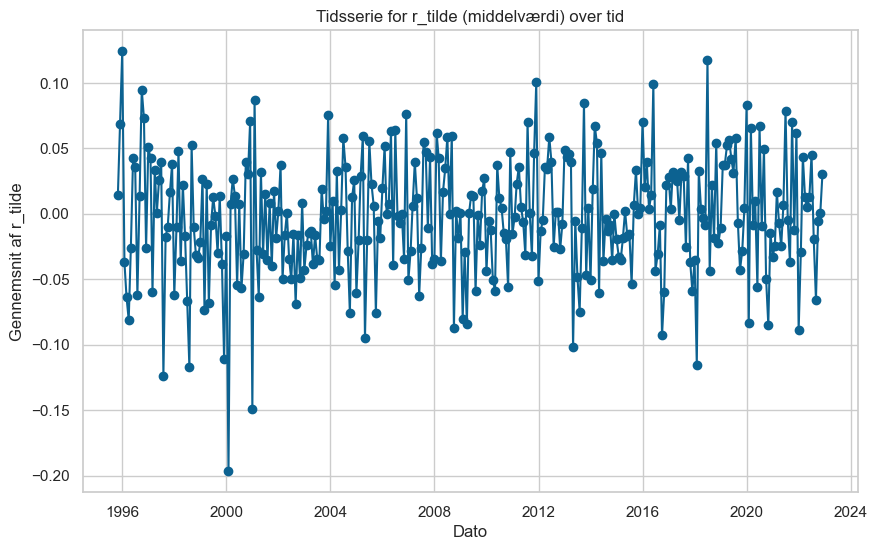

In [185]:
import matplotlib.pyplot as plt
import pandas as pd

# Eksempel: Udtræk middelværdien af r_tilde for hver dato
dates = []
r_tilde_means = []
for d, res in pfml_input['reals'].items():
    dates.append(pd.to_datetime(d))
    r_tilde_means.append(res['r_tilde'].mean())

plt.figure(figsize=(10, 6))
plt.plot(dates, r_tilde_means, marker='o')
plt.xlabel('Dato')
plt.ylabel('Gennemsnit af r_tilde')
plt.title('Tidsserie for r_tilde (middelværdi) over tid')
plt.show()


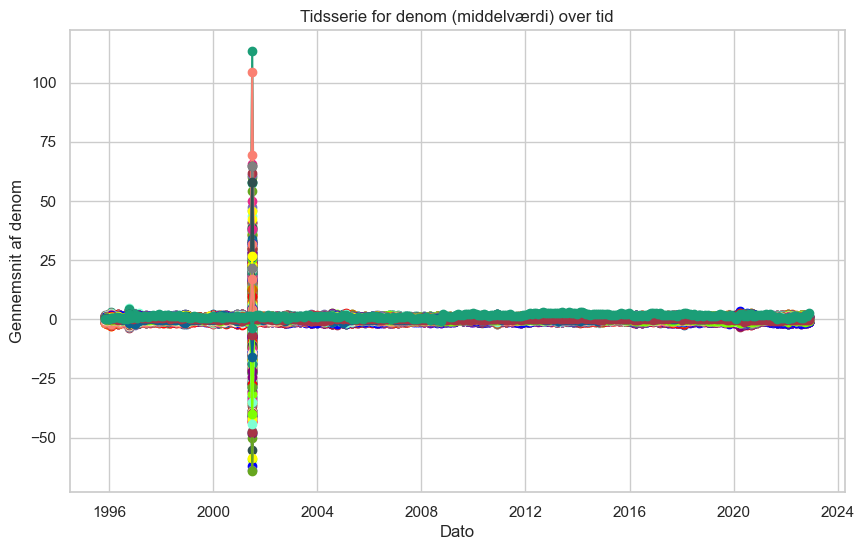

In [186]:
# Eksempel: Udtræk middelværdien af r_tilde for hver dato
dates = []
r_tilde_means = []
for d, res in pfml_input['reals'].items():
    dates.append(pd.to_datetime(d))
    r_tilde_means.append(res['denom'].mean())

plt.figure(figsize=(10, 6))
plt.plot(dates, r_tilde_means, marker='o')
plt.xlabel('Dato')
plt.ylabel('Gennemsnit af denom')
plt.title('Tidsserie for denom (middelværdi) over tid')
plt.show()

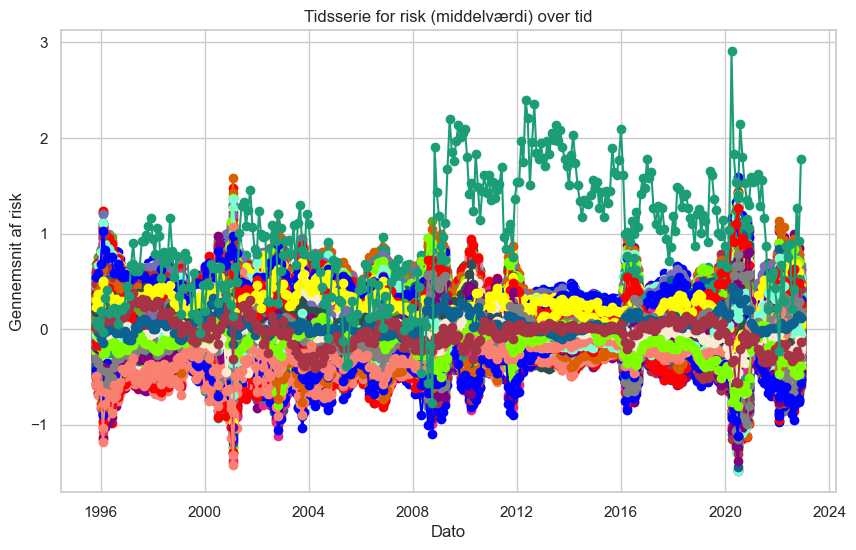

In [60]:
# Eksempel: Udtræk middelværdien af r_tilde for hver dato
dates = []
r_tilde_means = []
for d, res in pfml_input['reals'].items():
    dates.append(pd.to_datetime(d))
    r_tilde_means.append(res['risk'].mean())

plt.figure(figsize=(10, 6))
plt.plot(dates, r_tilde_means, marker='o')
plt.xlabel('Dato')
plt.ylabel('Gennemsnit af risk')
plt.title('Tidsserie for risk (middelværdi) over tid')
plt.show()

In [158]:
# Eksempel: Udtræk middelværdien af r_tilde for hver dato
dates = []
r_tilde_means = []
for d, res in pfml_input['reals'].items():
    dates.append(pd.to_datetime(d))
    r_tilde_means.append(res['tc'].mean())

plt.figure(figsize=(10, 6))
plt.plot(dates, r_tilde_means, marker='o')
plt.xlabel('Dato')
plt.ylabel('Gennemsnit af tc')
plt.title('Tidsserie for tc (middelværdi) over tid')
plt.show()

KeyError: 'reals'

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

dates = []
r_tilde_means = []
for d, res in pfml_input['reals'].items():
    dates.append(pd.to_datetime(d))
    r_tilde_means.append(res['r_tilde'].mean())

# Lav en DataFrame, så det er nemmere at arbejde med
df = pd.DataFrame({'date': dates, 'mean_r_tilde': r_tilde_means})

outliers = df[df['mean_r_tilde'] < -50]
print("Outliers fundet:")
print(outliers)

min_idx = df['mean_r_tilde'].idxmin()
outlier_row = df.loc[min_idx]
print("Dato med outlier:", outlier_row['date'])
print("Outlier-værdi:", outlier_row['mean_r_tilde'])



Outliers fundet:
Empty DataFrame
Columns: [date, mean_r_tilde]
Index: []
Dato med outlier: 2000-01-31 00:00:00
Outlier-værdi: -0.19674340944613852


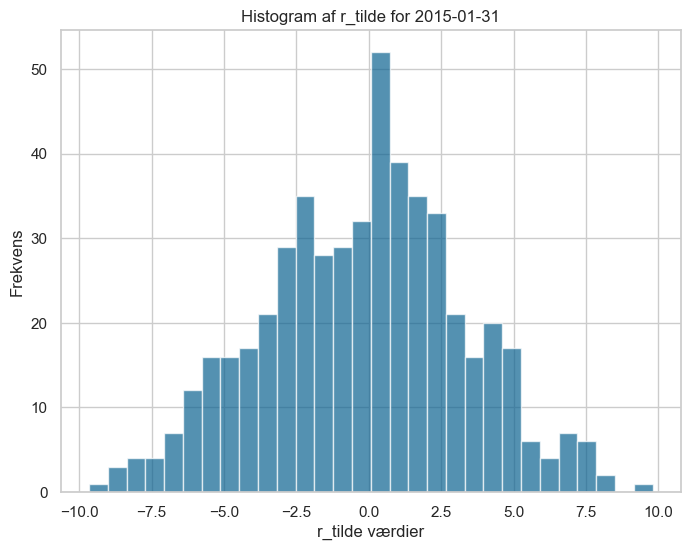

In [64]:
# Vælg en specifik dato, fx '1995-10-31'
r_tilde_vals = pfml_input['reals']['2000-01-31']['r_tilde']
plt.figure(figsize=(8, 6))
plt.hist(r_tilde_vals, bins=30, alpha=0.7)
plt.xlabel('r_tilde værdier')
plt.ylabel('Frekvens')
plt.title('Histogram af r_tilde for 2015-01-31')
plt.show()


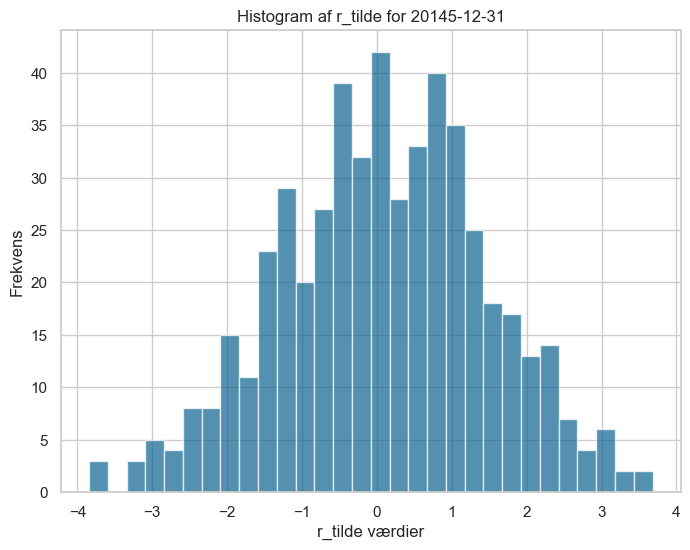

In [65]:
# Vælg en specifik dato, fx '1995-10-31'
r_tilde_vals = pfml_input['reals']['2001-01-31']['r_tilde']
plt.figure(figsize=(8, 6))
plt.hist(r_tilde_vals, bins=30, alpha=0.7)
plt.xlabel('r_tilde værdier')
plt.ylabel('Frekvens')
plt.title('Histogram af r_tilde for 20145-12-31')
plt.show()

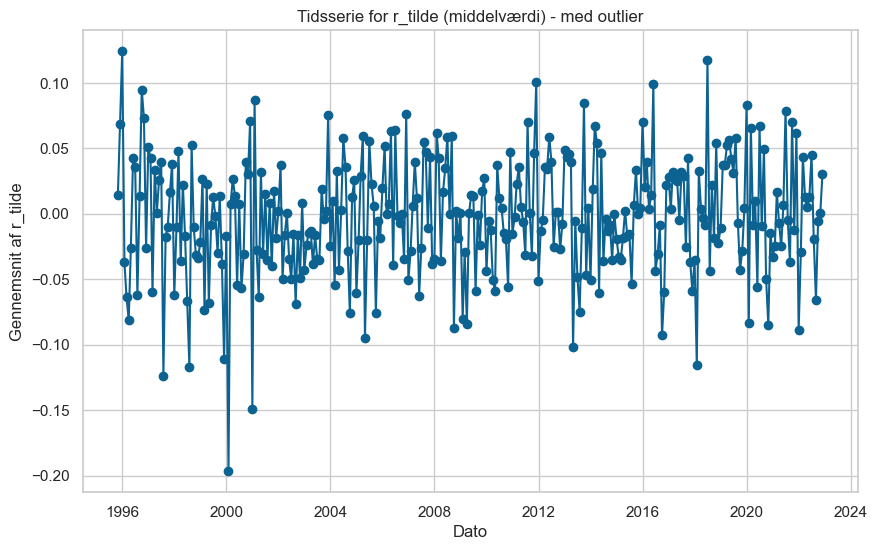

NameError: name 'df_no_outlier' is not defined

<Figure size 1000x600 with 0 Axes>

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['mean_r_tilde'], marker='o')
plt.xlabel('Dato')
plt.ylabel('Gennemsnit af r_tilde')
plt.title('Tidsserie for r_tilde (middelværdi) - med outlier')
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(df_no_outlier['date'], df_no_outlier['mean_r_tilde'], marker='o')
plt.xlabel('Dato')
plt.ylabel('Gennemsnit af r_tilde')
plt.title('Tidsserie for r_tilde (middelværdi) - uden outlier')
plt.show()



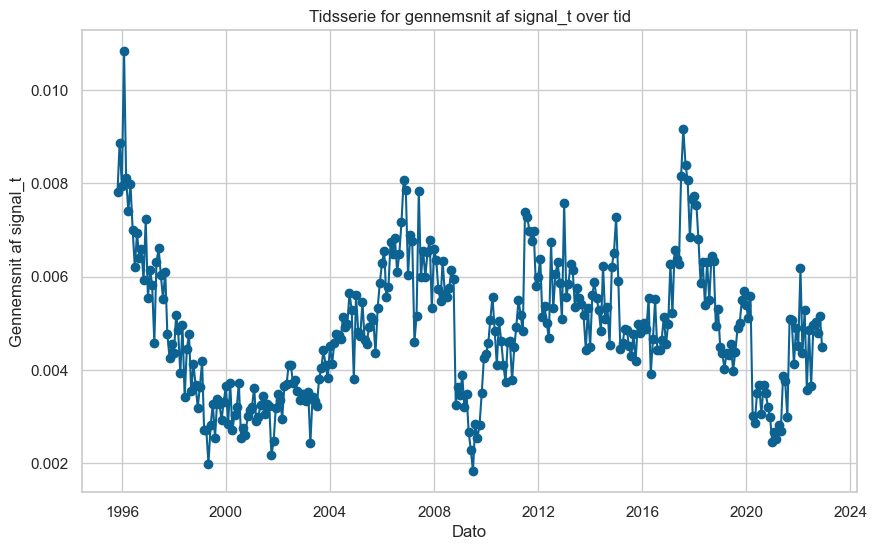

In [122]:
import pandas as pd

dates = []
signal_means = []
for d, mat in pfml_input['signal_t'].items():
    dates.append(pd.to_datetime(d))
    signal_means.append(mat.mean())

plt.figure(figsize=(10, 6))
plt.plot(dates, signal_means, marker='o')
plt.xlabel('Dato')
plt.ylabel('Gennemsnit af signal_t')
plt.title('Tidsserie for gennemsnit af signal_t over tid')
plt.show()


### check af pfml_w

In [128]:
# Final portfolio: select data_tc for dates in dates_oos and valid == True, then call pfml_w.
w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
w = pfml_w(w_data, dates=dates_oos, cov_list=cov_list, lambda_list=lambda_list, gamma_rel=gamma_rel, iter=iter, risk_free=risk_free, wealth=wealth, mu=mu, aims=aims_df)
# Sikrer, at id er integer i begge datasæt
w_data['id'] = w_data['id'].astype(int)
w['id'] = w['id'].astype(int)
pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
pf['type'] = "Portfolio-ML"

m_func: n = 180
DEBUG: For dato 2010-12-31 - Justeringsfaktor (første 5 rækker):
      id    tr_ld1    mu_ld1  adjustment_factor
0  10104  0.024954  0.020052           1.004805
1  10107 -0.006594  0.020052           0.973877
2  10138  0.021416  0.020052           1.001337
3  10696  0.054850  0.020052           1.034113
4  11308 -0.044363  0.020052           0.936851
DEBUG: For dato 2010-12-31 - beregnede w_opt_ld1:
        id  w_opt_ld1
0    10104   0.006428
1    10107   0.009003
2    10138   0.000852
3    10696   0.000287
4    11308   0.008576
..     ...        ...
175  87299   0.000752
176  87432   0.001044
177  87447   0.002699
178  87717   0.001227
179  92655   0.003384

[180 rows x 2 columns]

DEBUG: d=2010-12-31, next_month=2011-01-31, match=180 rækker
          id  w_start
1      10104      NaN
145    10107      NaN
289    10138      NaN
433    10696      NaN
577    11308      NaN
...      ...      ...
25145  87299      NaN
25289  87432      NaN
25433  87447      NaN
25577  8771

In [182]:
r_yearly = np.mean(pf['r'])*12
std_yearly = pf['r'].std() * np.sqrt(12)
SR_gross_yearly = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)
tc_yearly = pf['tc'].mean() * 12
r_tc_yearly = (pf['r'] - pf['tc']).mean() * 12
SR_net_yearly = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)
print("r:", r_yearly)
print("std:", std_yearly)
print("SR gross:", SR_gross_yearly)
print("TC:", tc_yearly)
print("r-TC:", r_tc_yearly)
print("SR net:", SR_net_yearly)

r: 0.042124017461386436
std: 0.04473118482391221
SR gross: 0.9417147707401649
TC: 0.00020619602746241013
r-TC: 0.04191782143392403
SR net: 0.937105100142927


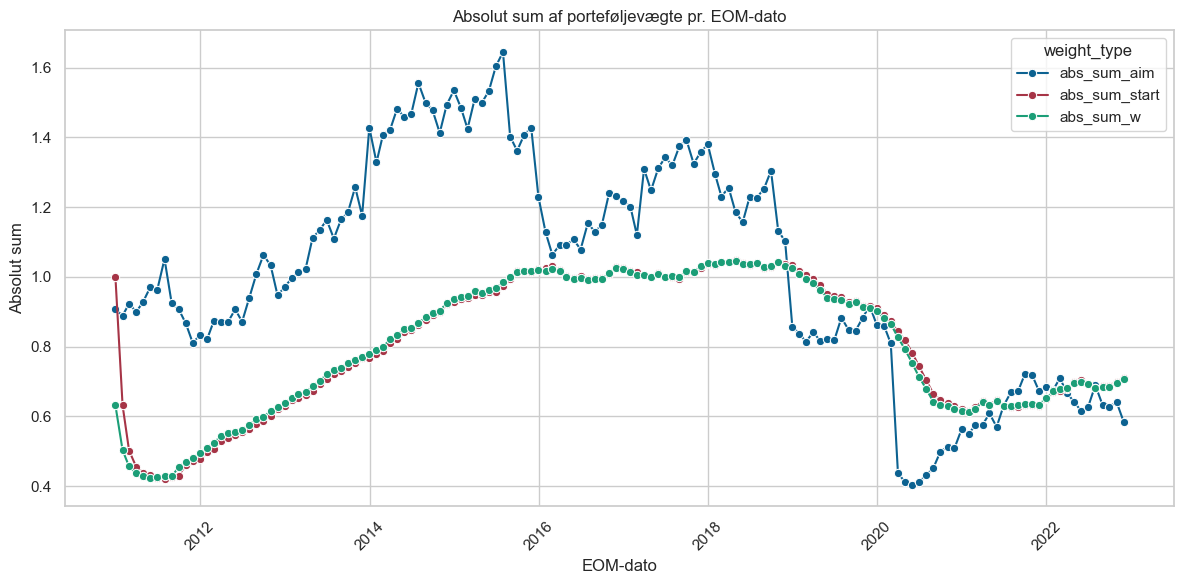

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Forudsætninger:
# aims_df har kolonnerne: 'eom' og 'w_aim'
# pfml_df har kolonnerne: 'eom', 'w_start' og 'w'
# Sørg for, at 'eom' er i datetime-format

aims_df['eom'] = pd.to_datetime(aims_df['eom'])
w['eom'] = pd.to_datetime(w['eom'])

# Beregn absolut sum for w_aim i aims_df
abs_sum_aim = aims_df.groupby('eom')['w_aim']\
    .apply(lambda x: x.abs().sum())\
    .reset_index(name='abs_sum_aim')

# Beregn absolut sum for w_start og w i pfml_df
abs_sum_pfml = w.groupby('eom').agg(
    abs_sum_start = ('w_start', lambda x: x.abs().sum()),
    abs_sum_w     = ('w', lambda x: x.abs().sum())
).reset_index()

# Merge de to dataframes på 'eom'
combined = pd.merge(abs_sum_aim, abs_sum_pfml, on='eom')

# Omform data til langt format for plotting med Seaborn
combined_long = combined.melt(id_vars='eom',
                              value_vars=['abs_sum_aim', 'abs_sum_start', 'abs_sum_w'],
                              var_name='weight_type',
                              value_name='abs_sum')

# Plot: lav en linje for hver vægt-type over tid
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_long, x='eom', y='abs_sum', hue='weight_type', marker='o')
plt.title("Absolut sum af porteføljevægte pr. EOM-dato")
plt.xlabel("EOM-dato")
plt.ylabel("Absolut sum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Check af pfml_w 2010 - 2013

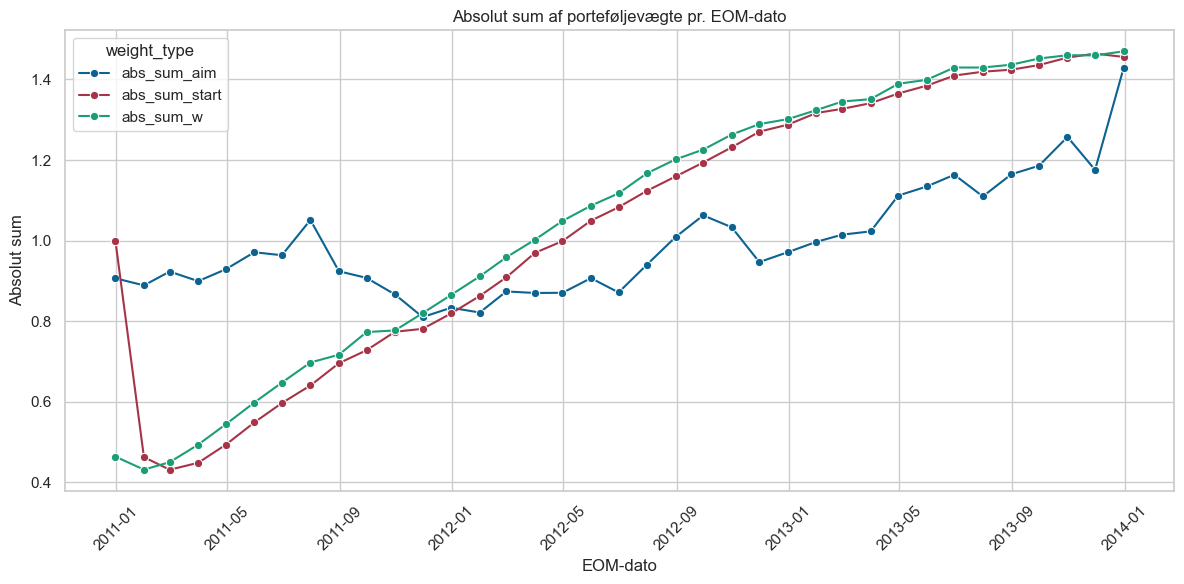

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Forudsætninger:
# aims_df har kolonnerne: 'eom' og 'w_aim'
# pfml_df har kolonnerne: 'eom', 'w_start' og 'w'
# Sørg for, at 'eom' er i datetime-format
cutoff_date = pd.Timestamp("2013-12-31")
aims_df = aims_df[aims_df['eom'] <= cutoff_date]
w = w[w['eom'] <= cutoff_date]

aims_df['eom'] = pd.to_datetime(aims_df['eom'])
w['eom'] = pd.to_datetime(w['eom'])

# Beregn absolut sum for w_aim i aims_df
abs_sum_aim = aims_df.groupby('eom')['w_aim']\
    .apply(lambda x: x.abs().sum())\
    .reset_index(name='abs_sum_aim')

# Beregn absolut sum for w_start og w i pfml_df
abs_sum_pfml = w.groupby('eom').agg(
    abs_sum_start = ('w_start', lambda x: x.abs().sum()),
    abs_sum_w     = ('w', lambda x: x.abs().sum())
).reset_index()

# Merge de to dataframes på 'eom'
combined = pd.merge(abs_sum_aim, abs_sum_pfml, on='eom')

# Omform data til langt format for plotting med Seaborn
combined_long = combined.melt(id_vars='eom',
                              value_vars=['abs_sum_aim', 'abs_sum_start', 'abs_sum_w'],
                              var_name='weight_type',
                              value_name='abs_sum')

# Plot: lav en linje for hver vægt-type over tid
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_long, x='eom', y='abs_sum', hue='weight_type', marker='o')
plt.title("Absolut sum af porteføljevægte pr. EOM-dato")
plt.xlabel("EOM-dato")
plt.ylabel("Absolut sum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [144]:
w

id        eom   w_start         w    tr_ld1    mu_ld1
0      10104 2010-12-31  0.019620  0.006397  0.024954  0.020052
1      10104 2011-01-31  0.006428 -0.000636  0.027140  0.038821
2      10104 2011-02-28 -0.000629 -0.004988  0.016218  0.003383
3      10104 2011-03-31 -0.005052 -0.007109  0.077442  0.027662
4      10104 2011-04-30 -0.007454 -0.009115 -0.048400 -0.015071
...      ...        ...       ...       ...       ...       ...
25752  92655 2013-08-31  0.028580  0.026941  0.002083  0.038329
25753  92655 2013-09-30  0.026000  0.025092 -0.046798  0.040602
25754  92655 2013-10-31  0.022984  0.022568  0.091090  0.028596
25755  92655 2013-11-30  0.023939  0.022758  0.014746  0.027672
25756  92655 2013-12-31  0.022471  0.021922 -0.040118 -0.033100

[6660 rows x 6 columns]

## Varierende gamma_rel

In [249]:
import pandas as pd
import numpy as np

results = []  # Liste til at gemme alle resultater

for gamma_val in range(1, 11):
    # Kald din pfml_w-funktion med gamma_rel = gamma_val
    w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
    w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
    
    # Beregn porteføljevægte for denne gamma_rel
    w = pfml_w(
        data=w_data,
        dates=dates_oos,
        cov_list=cov_list,
        lambda_list=lambda_list,
        gamma_rel=gamma_val,   # Vigtigste ændring
        iter=iter,
        risk_free=risk_free,
        wealth=wealth,
        mu=mu,
        aims=aims_df
    )
    
    # Sikrer, at id er integer i begge datasæt
    w_data['id'] = w_data['id'].astype(int)
    w['id'] = w['id'].astype(int)
    
    # Lav tidsserie-udregninger af porteføljeperformance
    pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_val)
    pf['type'] = "Portfolio-ML"
 
    # Beregn dine ønskede nøgletal
    inv               = pf['inv'].mean()
    shorting          = pf['shorting'].mean()
    turnover_notional = pf['turnover'].mean()
    r_yearly          = np.mean(pf['r']) * 12
    std_yearly        = pf['r'].std() * np.sqrt(12)
    SR_gross_yearly   = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)
    tc_yearly         = pf['tc'].mean() * 12
    r_tc_yearly       = (pf['r'] - pf['tc']).mean() * 12
    SR_net_yearly     = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)
    
    # Gem resultatet i en dictionary, som du kan konvertere til DataFrame bagefter
    results.append({
        'gamma_rel': gamma_val,
        'inv': inv,
        'shorting': shorting,
        'turnover': turnover_notional,
        'r_yearly': r_yearly,
        'std_yearly': std_yearly,
        'SR_gross_yearly': SR_gross_yearly,
        'tc_yearly': tc_yearly,
        'r_tc_yearly': r_tc_yearly,
        'SR_net_yearly': SR_net_yearly
    })

# Konverter resultaterne til en DataFrame
results_df = pd.DataFrame(results)
print(results_df)


m_func: n = 180

DEBUG: d=2010-12-31, next_month=2011-01-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-01-31, next_month=2011-02-28, match=180 rækker
m_func: n = 180

DEBUG: d=2011-02-28, next_month=2011-03-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-03-31, next_month=2011-04-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-04-30, next_month=2011-05-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-05-31, next_month=2011-06-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-06-30, next_month=2011-07-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-07-31, next_month=2011-08-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-08-31, next_month=2011-09-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-09-30, next_month=2011-10-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-10-31, next_month=2011-11-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-11-30, next_month=2011-12-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-12-31, next_month=2012-01-31, mat

In [250]:
results_df = pd.DataFrame(results)
#print(results_df)
display(results_df)

gamma_rel       inv  shorting  turnover  r_yearly  std_yearly  \
0          1  0.802493  0.269562  0.031552  0.042124    0.044731   
1          2  0.865077  0.303589  0.040493  0.040117    0.045394   
2          3  0.896543  0.320181  0.046987  0.038878    0.045722   
3          4  0.918350  0.331476  0.052585  0.038203    0.045895   
4          5  0.987951  0.367001  0.066783  0.038031    0.046365   
5          6  2.099857  0.911885  0.246572  0.034684    0.081774   
6          7  3.019937  1.348899  0.159688  0.032406    0.079085   
7          8  0.996377  0.375631  0.077067  0.038433    0.046981   
8          9  1.039707  0.391057  0.071722  0.036762    0.046630   
9         10  2.638945  1.166605  0.153518  0.031314    0.071505   

   SR_gross_yearly  tc_yearly  r_tc_yearly  SR_net_yearly  
0         0.941715   0.000206     0.041918       0.937105  
1         0.883744   0.000327     0.039790       0.876534  
2         0.850316   0.000431     0.038447       0.840893  
3         0.832400   0.000536     0.037667       0.820725  
4         0.820251   0.001559     0.036472       0.786629  
5         0.424143   0.229913    -0.195229      -2.387432  
6         0.409762   0.011391     0.021015       0.265731  
7         0.818053   0.002951     0.035483       0.755251  
8         0.788374   0.000980     0.035782       0.767350  
9         0.437925   0.008128     0.023186       0.324260

# Relevant plots og stats for Portfolio-ML (pfml)

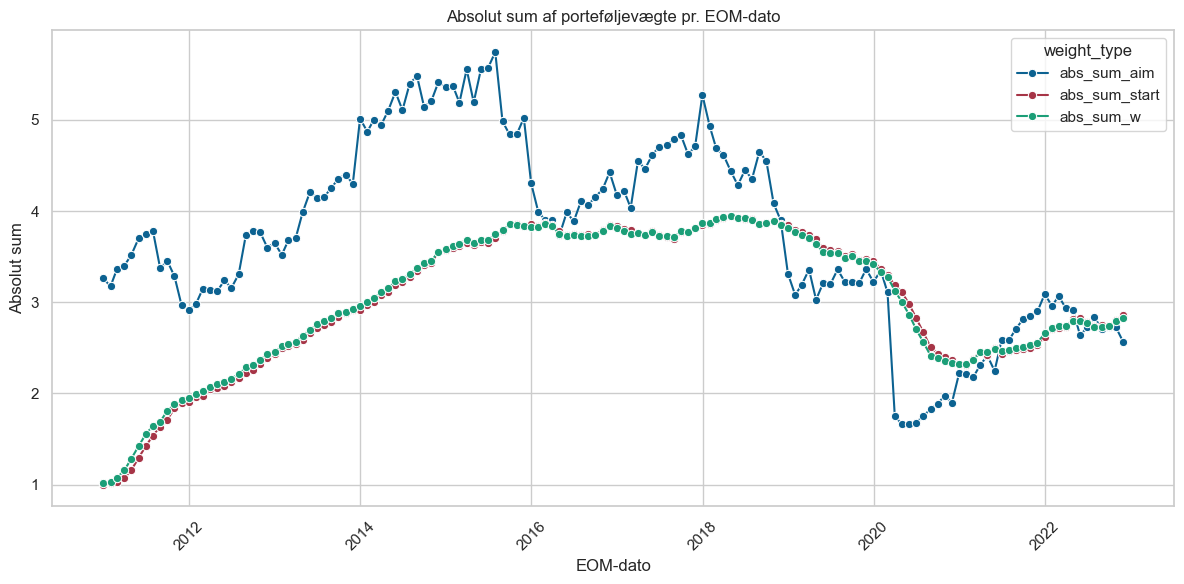

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Forudsætninger:
# aims_df har kolonnerne: 'eom' og 'w_aim'
# pfml_df har kolonnerne: 'eom', 'w_start' og 'w'
# Sørg for, at 'eom' er i datetime-format

pfml['aims']['eom'] = pd.to_datetime(pfml['aims']['eom'])
pfml['w']['eom'] = pd.to_datetime(pfml['w']['eom'])

# Beregn absolut sum for w_aim i aims_df
abs_sum_aim = pfml['aims'].groupby('eom')['w_aim']\
    .apply(lambda x: x.abs().sum())\
    .reset_index(name='abs_sum_aim')

# Beregn absolut sum for w_start og w i pfml_df
abs_sum_pfml = pfml['w'].groupby('eom').agg(
    abs_sum_start = ('w_start', lambda x: x.abs().sum()),
    abs_sum_w     = ('w', lambda x: x.abs().sum())
).reset_index()

# Merge de to dataframes på 'eom'
combined = pd.merge(abs_sum_aim, abs_sum_pfml, on='eom')

# Omform data til langt format for plotting med Seaborn
combined_long = combined.melt(id_vars='eom',
                              value_vars=['abs_sum_aim', 'abs_sum_start', 'abs_sum_w'],
                              var_name='weight_type',
                              value_name='abs_sum')

# Plot: lav en linje for hver vægt-type over tid
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_long, x='eom', y='abs_sum', hue='weight_type', marker='o')
plt.title("Absolut sum af porteføljevægte pr. EOM-dato")
plt.xlabel("EOM-dato")
plt.ylabel("Absolut sum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


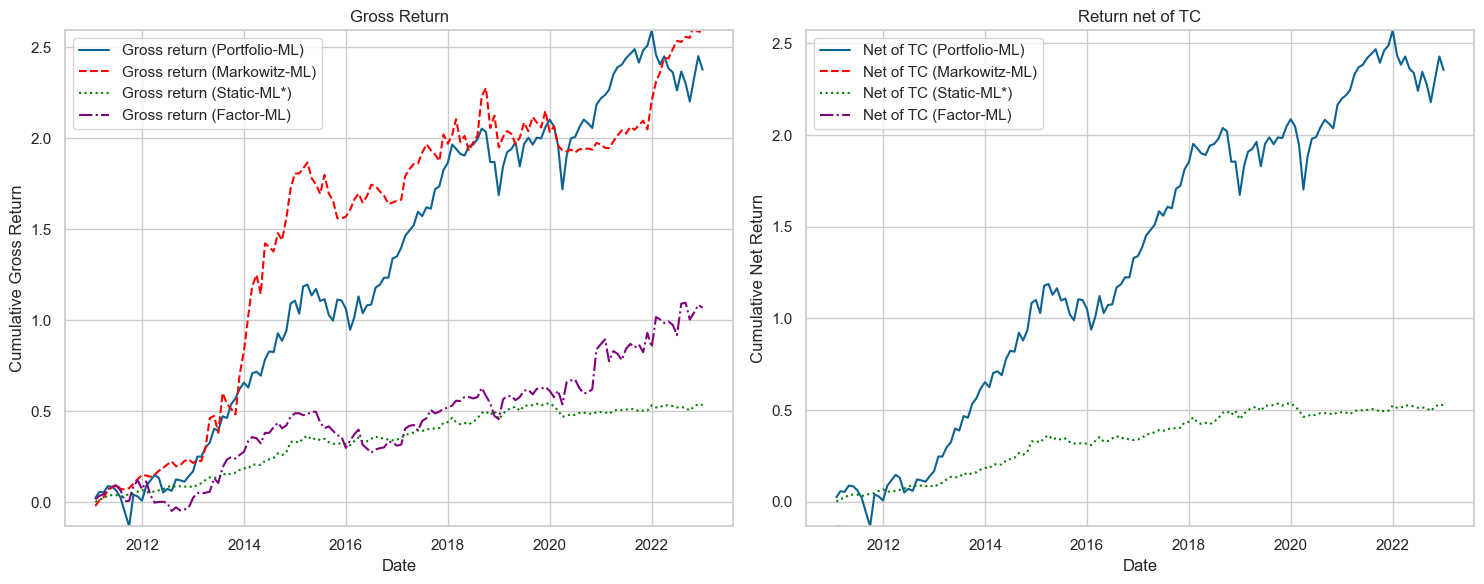

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Kopier dataframes
pfml_data = pfml["pf"].copy()
tpf_data = tpf["pf"].copy()
static_data = static["pf"].copy()
factor_data = factor_ml["pf"].copy()

# Beregn kumulative afkast for Portfolio-ML
pfml_data['cumret'] = pfml_data['r'].cumsum()
pfml_data['cumret_tc'] = (pfml_data['r'] - pfml_data['tc']).cumsum()

# Beregn kumulative afkast for Markowitz-ML
tpf_data['cumret'] = tpf_data['r'].cumsum()
tpf_data['cumret_tc'] = (tpf_data['r'] - tpf_data['tc']).cumsum()

# Beregn kumulative afkast for Static-ML*
static_data['cumret'] = static_data['r'].cumsum()
static_data['cumret_tc'] = (static_data['r'] - static_data['tc']).cumsum()

# Beregn kumulative afkast for Factor-ML
factor_data['cumret'] = factor_data['r'].cumsum()
factor_data['cumret_tc'] = (factor_data['r'] - factor_data['tc']).cumsum()

# Opret to subplots (én for Gross Return og én for Return net of TC)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot for Gross Return ---
ax = axes[0]
# Portfolio-ML
ax.plot(pfml_data['eom_ret'], pfml_data['cumret'], label='Gross return (Portfolio-ML)')
# Markowitz-ML
ax.plot(tpf_data['eom_ret'], tpf_data['cumret'], label='Gross return (Markowitz-ML)', color='red', linestyle='--')
# Static-ML*
ax.plot(static_data['eom_ret'], static_data['cumret'], label='Gross return (Static-ML*)', color='green', linestyle=':')
# Factor-ML
ax.plot(factor_data['eom_ret'], factor_data['cumret'], label='Gross return (Factor-ML)', color='purple', linestyle='-.')
# Sæt y-aksens grænser ud fra Portfolio-ML
y_min = pfml_data['cumret'].min()
y_max = pfml_data['cumret'].max()
ax.set_ylim(y_min, y_max)

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Gross Return')
ax.set_title('Gross Return')
ax.grid(True)
ax.legend()

# --- Plot for Return net of TC ---
ax = axes[1]
# Portfolio-ML
ax.plot(pfml_data['eom_ret'], pfml_data['cumret_tc'], label='Net of TC (Portfolio-ML)')
# Markowitz-ML
ax.plot(tpf_data['eom_ret'], tpf_data['cumret_tc'], label='Net of TC (Markowitz-ML)', color='red', linestyle='--')
# Static-ML*
ax.plot(static_data['eom_ret'], static_data['cumret_tc'], label='Net of TC (Static-ML*)', color='green', linestyle=':')
# Factor-ML
ax.plot(factor_data['eom_ret'], factor_data['cumret_tc'], label='Net of TC (Factor-ML)', color='purple', linestyle='-.')
# Sæt y-aksens grænser ud fra Portfolio-ML
y_min_tc = pfml_data['cumret_tc'].min()
y_max_tc = pfml_data['cumret_tc'].max()
ax.set_ylim(y_min_tc, y_max_tc)

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Net Return')
ax.set_title('Return net of TC')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


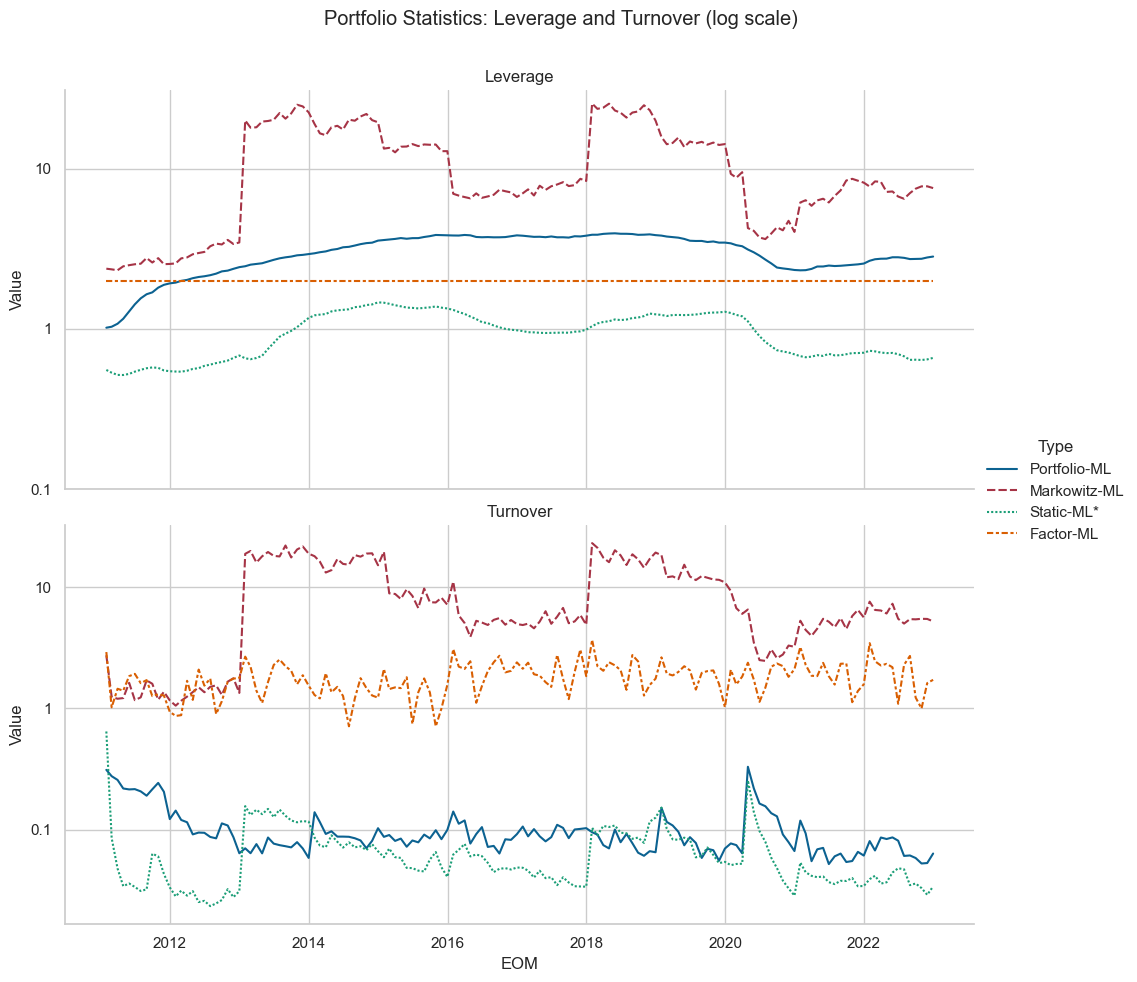

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Kopiér dine pf-data fra de forskellige modeller
pfml_pf = pfml['pf'].copy()
tpf_pf = tpf['pf'].copy()
static_pf = static['pf'].copy()
factor_pf = factor_ml['pf'].copy()

# 2. Sørg for at type-kolonnen er sat korrekt
pfml_pf["type"] = "Portfolio-ML"
tpf_pf["type"] = "Markowitz-ML"
static_pf["type"] = "Static-ML*"
factor_pf["type"] = "Factor-ML"

# 3. Vælg kun de kolonner, du er interesseret i: eom_ret, inv og turnover (samt type)
ws = pd.concat([
    pfml_pf[['eom_ret', 'inv', 'turnover', 'type']],
    tpf_pf[['eom_ret', 'inv', 'turnover', 'type']],
    static_pf[['eom_ret', 'inv', 'turnover', 'type']],
    factor_pf[['eom_ret', 'inv', 'turnover', 'type']]
], ignore_index=True)

# 4. Omdøb eom_ret til eom for korthed
ws.rename(columns={'eom_ret': 'eom'}, inplace=True)

# 5. Konverter til long format, så vi kan plotte Leverage og Turnover i separate paneler
ws_long = ws.melt(
    id_vars=['type', 'eom'],
    value_vars=['inv', 'turnover'],
    var_name='metric',
    value_name='value'
)

# 6. Omdøb metric-værdier til pænere navne
ws_long['metric'] = ws_long['metric'].map({
    'inv': 'Leverage',
    'turnover': 'Turnover'
})

# Hvis du ønsker at filtrere på specifikke porteføljetyper:
main_types = ["Portfolio-ML", "Markowitz-ML", "Static-ML*", "Factor-ML"]
ws_long = ws_long[ws_long['type'].isin(main_types)]

# 7. Plot med Seaborn's FacetGrid: ét panel for Leverage og ét for Turnover
g = sns.FacetGrid(ws_long, col="metric", col_wrap=1, sharey=False, height=5, aspect=2)
g.map_dataframe(sns.lineplot, x="eom", y="value", hue="type", style="type")

# Sæt y-aksen til log-skala
g.set(yscale="log")

# Fjern "metric = " i facettitlen og vis kun "Leverage" eller "Turnover"
g.set_titles("{col_name}")

# Tilføj en fælles legend
g.add_legend(title="Type")

# Angiv selv ticks på y-aksen, fx [0.1, 1, 10] med labels "0.1", "1", "10"
for ax in g.axes.flatten():
    ax.set_yticks([0.1, 1, 10])
    ax.set_yticklabels(['0.1', '1', '10'])

# Sæt akse-labels og en overordnet titel
g.set_axis_labels("EOM", "Value")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Portfolio Statistics: Leverage and Turnover (log scale)")

plt.show()


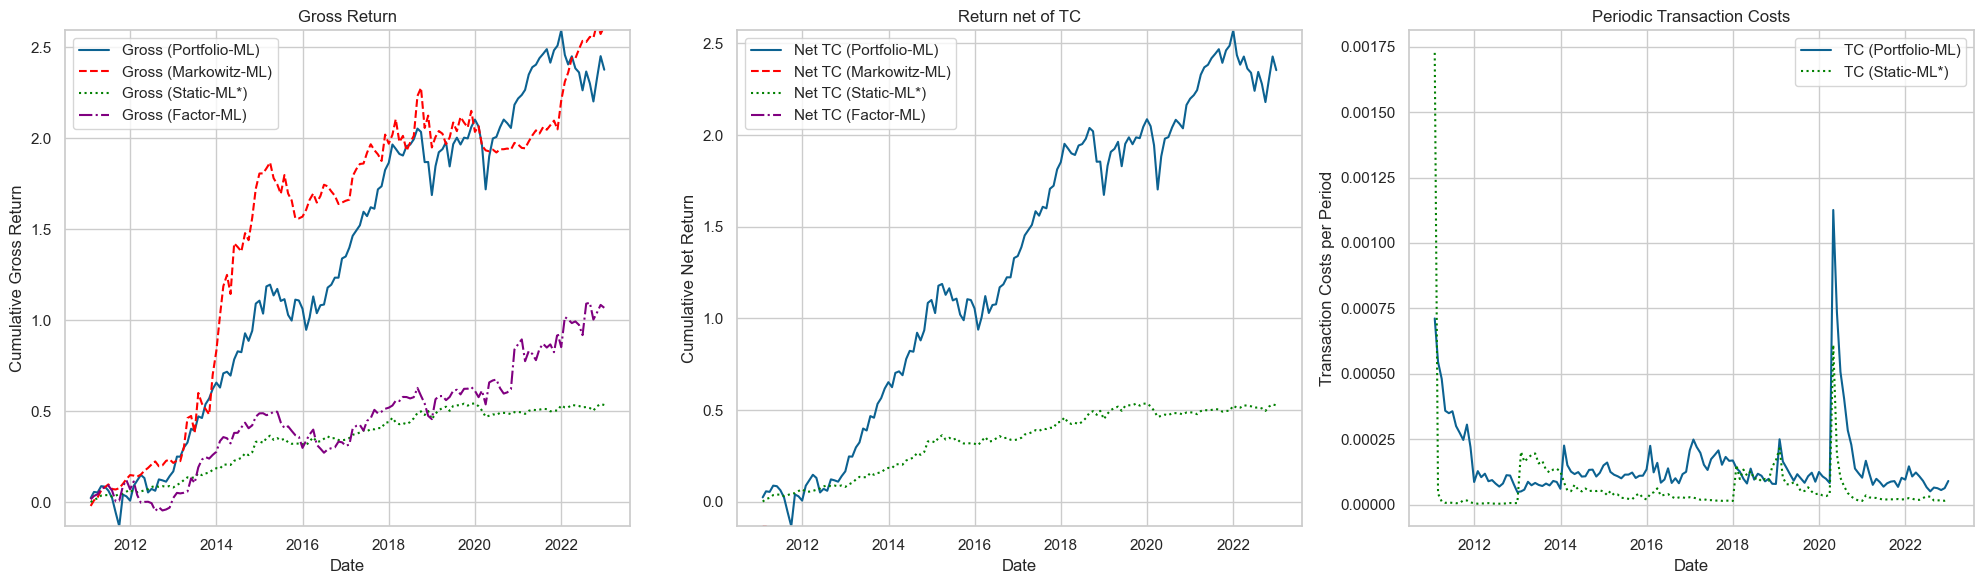

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Kopier dataframes
pfml_data = pfml["pf"].copy()
tpf_data = tpf["pf"].copy()
static_data = static["pf"].copy()
factor_data = factor_ml["pf"].copy()

# Beregn kumulative afkast for Portfolio-ML
pfml_data['cumret'] = pfml_data['r'].cumsum()
pfml_data['cumret_tc'] = (pfml_data['r'] - pfml_data['tc']).cumsum()

# Beregn kumulative afkast for Markowitz-ML
tpf_data['cumret'] = tpf_data['r'].cumsum()
tpf_data['cumret_tc'] = (tpf_data['r'] - tpf_data['tc']).cumsum()

# Beregn kumulative afkast for Static-ML*
static_data['cumret'] = static_data['r'].cumsum()
static_data['cumret_tc'] = (static_data['r'] - static_data['tc']).cumsum()

# Beregn kumulative afkast for Factor-ML
factor_data['cumret'] = factor_data['r'].cumsum()
factor_data['cumret_tc'] = (factor_data['r'] - factor_data['tc']).cumsum()

# Opret 3 subplots: Gross Return, Return net of TC og periodiske TC
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# --- Plot 1: Gross Return ---
ax = axes[0]
ax.plot(pfml_data['eom_ret'], pfml_data['cumret'], label='Gross (Portfolio-ML)')
ax.plot(tpf_data['eom_ret'], tpf_data['cumret'], label='Gross (Markowitz-ML)', 
        color='red', linestyle='--')
ax.plot(static_data['eom_ret'], static_data['cumret'], label='Gross (Static-ML*)', 
        color='green', linestyle=':')
ax.plot(factor_data['eom_ret'], factor_data['cumret'], label='Gross (Factor-ML)', 
        color='purple', linestyle='-.')
y_min = pfml_data['cumret'].min()
y_max = pfml_data['cumret'].max()
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Gross Return')
ax.set_title('Gross Return')
ax.grid(True)
ax.legend()

# --- Plot 2: Return net of TC ---
ax = axes[1]
ax.plot(pfml_data['eom_ret'], pfml_data['cumret_tc'], label='Net TC (Portfolio-ML)')
ax.plot(tpf_data['eom_ret'], tpf_data['cumret_tc'], label='Net TC (Markowitz-ML)', 
        color='red', linestyle='--')
ax.plot(static_data['eom_ret'], static_data['cumret_tc'], label='Net TC (Static-ML*)', 
        color='green', linestyle=':')
ax.plot(factor_data['eom_ret'], factor_data['cumret_tc'], label='Net TC (Factor-ML)', 
        color='purple', linestyle='-.')
y_min_tc = pfml_data['cumret_tc'].min()
y_max_tc = pfml_data['cumret_tc'].max()
ax.set_ylim(y_min_tc, y_max_tc)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Net Return')
ax.set_title('Return net of TC')
ax.grid(True)
ax.legend()

# --- Plot 3: Periodiske Transaction Costs (kun Portfolio-ML og Static-ML*) ---
ax = axes[2]
ax.plot(pfml_data['eom_ret'], pfml_data['tc'], label='TC (Portfolio-ML)')
ax.plot(static_data['eom_ret'], static_data['tc'], label='TC (Static-ML*)', 
        color='green', linestyle=':')
ax.set_xlabel('Date')
ax.set_ylabel('Transaction Costs per Period')
ax.set_title('Periodic Transaction Costs')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


In [128]:
display(pf_summary)

type    n        inv  shorting  turnover_notional         r  \
0      Portfolio-ML  144   3.029671  0.814628           0.099722  0.198039   
1         Static-ML  144   4.225897  1.742836           0.145632  0.095125   
2        Static-ML*  144   0.955967  0.304393           0.067874  0.044620   
3      Markowitz-ML  144  10.953368  5.048301           8.776867  0.217868   
4         Factor-ML  144   2.000000  1.000000           1.823863  0.089088   
5           Rank-ML  144   2.000000  1.000000           0.987215  0.047434   
6  Minimum Variance  144   2.280726  0.640363           1.142763  0.108365   
7               1/N  144   1.000000  0.000000           0.052444  0.129325   
8            Market  144   1.000000  0.000000           0.008496  0.120273   

         sd  sr_gross         tc       r_tc          sr        obj  
0  0.242310  0.817298   0.001830   0.196210    0.809748  -0.097360  
1  0.127910  0.743682   0.003174   0.091950    0.718866   0.010145  
2  0.047281  0.943727   0.000810   0.043810    0.926586   0.032632  
3  0.251235  0.867189  50.583412 -50.365544 -200.471870 -50.681139  
4  0.161915  0.550212   2.586110  -2.497022  -15.421821  -2.628104  
5  0.086572  0.547911   0.451931  -0.404497   -4.672365  -0.441971  
6  0.121299  0.893375   0.601862  -0.493497   -4.068447  -0.567064  
7  0.158812  0.814327   0.001649   0.127676    0.803943   0.001570  
8  0.143452  0.838420   0.000031   0.120242    0.838207   0.017350

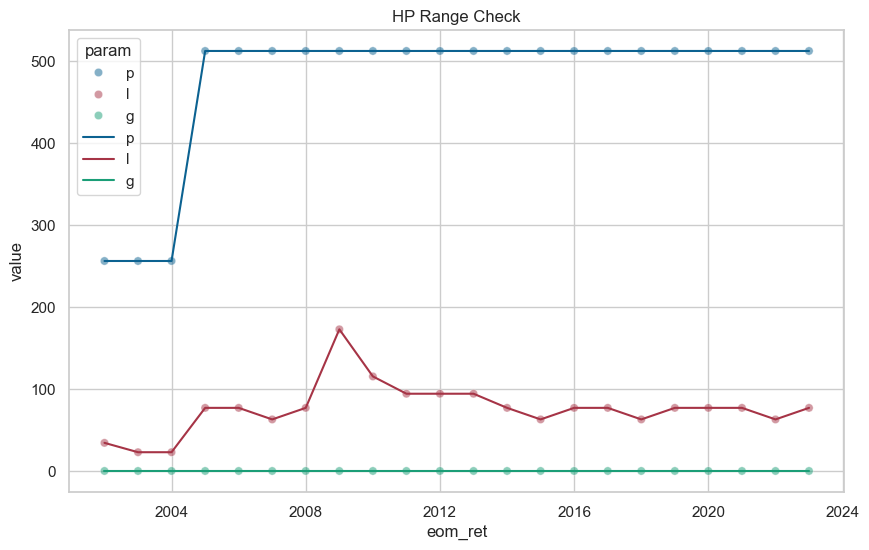

In [163]:
# (Optional: Create a diagnostic plot here – omitted or commented out)
# For example, using seaborn:
import seaborn as sns
import matplotlib.pyplot as plt
melt_df = pfml['best_hps'].melt(id_vars=['eom_ret'], value_vars=['p', 'l', 'g'], var_name='param', value_name='value')
plt.figure(figsize=(10,6))
sns.scatterplot(data=melt_df, x='eom_ret', y='value', hue='param', alpha=0.5)
sns.lineplot(data=melt_df, x='eom_ret', y='value', hue='param')
plt.title("HP Range Check")
plt.show()

In [153]:
#pfml['pf']
#static['pf']
#tpf['pf']
#factor_ml['pf']

         eom    mu_ld1    tr_ld1  update_factor
0 1982-12-31  0.041776 -0.033818       0.927437
1 1982-12-31  0.041776  0.012441       0.971841
2 1982-12-31  0.041776  0.090745       1.047005
3 1982-12-31  0.041776  0.027109       0.985920
4 1982-12-31  0.041776  0.070947       1.028001


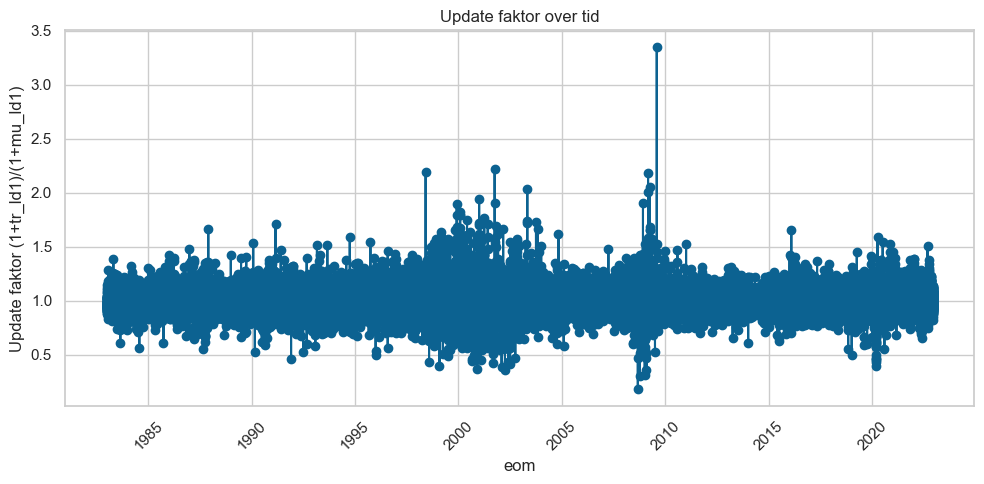

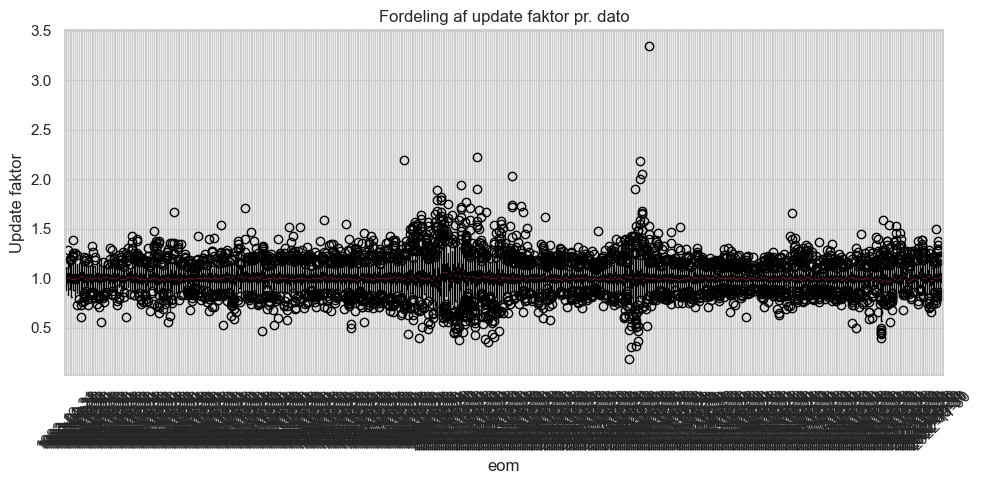

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Antag, at du har to dataframes:
# df_mu med kolonnerne 'eom' og 'mu_ld1'
# df_tr med kolonnerne 'eom' og 'tr_ld1'

# Sørg for, at 'eom' er datetime-format
wealth['eom'] = pd.to_datetime(wealth['eom'])
data_tc['eom'] = pd.to_datetime(data_tc['eom'])

# Merge de to dataframes på 'eom'
df_inputs = pd.merge(wealth[['eom', 'mu_ld1']], data_tc[['eom', 'tr_ld1']], on='eom', how='inner')

# Beregn update-faktoren: (1 + tr_ld1) / (1 + mu_ld1)
df_inputs['update_factor'] = (1 + df_inputs['tr_ld1']) / (1 + df_inputs['mu_ld1'])

# Udskriv en kort oversigt
print(df_inputs.head())

# Plot update-faktoren over tid
plt.figure(figsize=(10, 5))
plt.plot(df_inputs['eom'], df_inputs['update_factor'], marker='o', linestyle='-')
plt.xlabel('eom')
plt.ylabel('Update faktor (1+tr_ld1)/(1+mu_ld1)')
plt.title('Update faktor over tid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hvis du vil lave et boxplot (hvis der er flere observationer pr. dato),
# kan du f.eks. gruppere på 'eom' og se fordelingen:
grouped = df_inputs.groupby('eom')['update_factor']
data_to_plot = [group for name, group in grouped]

plt.figure(figsize=(10, 5))
plt.boxplot(data_to_plot, labels=[name.strftime('%Y-%m-%d') for name, group in grouped])
plt.xlabel('eom')
plt.ylabel('Update faktor')
plt.title('Fordeling af update faktor pr. dato')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
def plot_specific_ids(df, id_list=None, weight_col='w'):
    """
    Plotter 'weight_col' for de ID'er, der findes i id_list.
    Hvis id_list er None, plottes alle ID'er.
    Viser en linje for hver ID.
    """
    if id_list is None:
        id_list = df['id'].unique().tolist()
    
    # Filtrér til de ønskede id'er
    df_sub = df[df['id'].isin(id_list)].copy()
    df_sub = df_sub.sort_values('eom')
    
    # Pivotér så index = eom, columns = id, values = weight_col
    pivot_df = df_sub.pivot(index='eom', columns='id', values=weight_col)

    # Plot
    pivot_df.plot(figsize=(10, 6), legend = False)
    plt.title(f"Udvikling i {weight_col} for ID'er")
    plt.xlabel("Dato")
    plt.ylabel(weight_col)
    #plt.legend(title="ID")
    plt.show()


NameError: name 'tpf_new' is not defined

In [3]:
pfml['w']

NameError: name 'pfml' is not defined